# Project 2 : Data analysis on education systems

***

<div style="text-align: justify"> The aim of this project is to build-up a pre-analysis on a dataset from a company that wants to export itself internationally. During a meeting, our manager, Mark, several questions have been raised that will need to be answered throughout this project : </div>

- What are the countries that have the highest potential customers that fulfill our services?
- For each of these countries, what will be the evolution of the potential customers?
- In which countries should the company operate in priority?

<div style="text-align: justify"> The dataset provided is from <a href="https://datatopics.worldbank.org/education/"> the World Bank website</a> and gives us an overview on the education around the world. In summary, the World Bank's "EdStats All Indicator Query" lists 4,000 international indicators describing access to education, graduation, and information about teachers, education-related expenditures and so on. </div> <br>

<div style="text-align: justify"> With this dataset, we will be able to answer to our primary asked questions. Nevertheless, we will need to do a succession of data manipulation on this dataset to filter, clean and select the correct indicators in order to get useful and correct insights when doing the analysis of the indicators selected. </div> <br>

<div style="text-align: justify"> The data are collectable in its <a href="https://datacatalog.worldbank.org/search/dataset/0038480"> Data Catalog</a> and it contains several files that describe the different indicators from its definition to its value over the years. In this study, we will focus principally on two files that are <em>EdStatsCountry.csv</em> that gives information about each country (Region, 2-alpha code, currency uit and so) and <em>EdStatsData.csv</em> that provides the data over the years for all the different indicators. </div>

***

#### Data Content of EdStatsCountry.csv
<blockquote> 
<b>Country Code :</b> Short alphabetic developed to represent countries and dependent areas and follow the ISO 3166-1 alpha-3 code. <br>
<b>Short Name :</b> Standard country names used in a daily basic. <br>
<b>Long Name :</b> Official (complete) name of the countries. <br>
<b>2-alpha code :</b> ISO 3166-1 alpha-2 codes represente the two-letter country codes, part of the ISO 3166 standard. <br>
<b>Currency unit :</b> The unit of money used in a particular currency (or country). <br>
<b>Region :</b> Region where a specific country is located in. <br>
<b>Income Group :</b> Group of income where the country lays in <br>
<b>Et cetera :</b> Lots more features have been left out and didn't be loaded <br>
</blockquote>

***

#### Data Content of EdStatsData.csv
<blockquote>
<b>Country Name :</b> Standard country names used in a daily basic. <br>
<b>Country Code :</b> Short alphabetic developed to represent countries and dependent areas and follow the ISO 3166-1 alpha-3 code. <br>
<b>Indicator Name :</b> Overall description of the indicator. <br>
<b>Indicator Code :</b> Code generated for the specific indicator. <br>
<b>1970 to 2100 :</b> Data of an indicator for a specific data (between 1970 and 2100). <br>
</blockquote>

***

<div style="text-align: justify"> After reviewing all the possibile indicators (from <em>EdStatsData.csv</em> file), I came out with 4 indicators with one of them a projection indicator. According to me, these indicators seem the most accurate for our study : </div>

- <b>'PRJ.ATT.15UP.3.MF' :</b> projection indicator on the percentage of the population aged 15+ by highest level of educational attainment
- <b>'NY.GDP.PCAP.CD' :</b> indicator of the GDP per capita (current US&#36;)
- <b>'IT.CMP.PCMP.P2' :</b> indicator of the personal computers owners (per 100 people)
- <b>'SP.POP.1524.TO.UN' :</b> indicator of the population, ages 15-24, total (male and female)

Before diving in the cleaning process of the dataset, here is a quick overview of the notebook's contents.

***

#### Summary of the contents
* [Python's libraries](#Python-libraries)
* [Reading CSV's files and content overview](#Read-CSV-files-and-content-overview)
* [Cleaning the projection indicator](#Cleaning-the-projection-indicator)
* [Data manipulation of the projection indicator](#Data-manipulation-of-the-projection-indicator)
* [Analysis of the projection indicator](#Analysis-of-the-projection-indicator)
* [Cleaning the standard indicators](#Cleaning-the-standard-indicators)
* [Data manipulation of the standard indicators](#Data-manipulation-of-the-standard-indicators)
* [Analysis of the standard indicators](#Analysis-of-the-standard-indicators)
    * [Analysis of the GDP indicator](#Analysis-of-the-GDP-indicator)
    * [Analysis of the IT indicator](#Analysis-of-the-Personal-computer-owners-indicator)
    * [Analysis of the Population growth indicator](#Analysis-of-the-Population-growth-ages15-24-indicator)

***

<div style="text-align: justify"> Throughout the project, some functions have been created and developped to ease the work and to apply the DRY and Do One Thing principles. A docstring has been written for each of the function but here's a snippet of these functions :  </div>

- <b><a href='#retrieve_indicator'>retrieve_indicator()</a> </b>: returns a DataFrame filtered with a list of indicators
- <b><a href='#clc_stat'>clc_stat()</a> </b>: groups countries by Region, compute with the function func passed as arg
- <b><a href='#disp_graph_ind'>disp_graph_ind()</a> </b>: generates a lineplot for an indicator
- <b><a href='#add_mean_med_std_cols'>add_mean_med_std_cols()</a> </b>: returns the same DataFrame df with mean, median and std columns added
- <b><a href='#disp_sp_ind'>disp_sp_ind()</a> </b>: generates a scatterplot between the mean and std cols
- <b><a href='#plt_bp'>plt_bp()</a> </b>: displays a boxplot of an indicator to study the possible outliers
- <b><a href='#group_stat_t_plot'>group_stat_t_plot()</a> </b>: returns 3 DataFrame grouped by region, calculate statistics (mean, median, std), transposing the grouped DF in order to plot the resulting DF

***

## Python libraries

In [1]:
# Importing all the Python libraries

import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import missingno as msno

## Read CSV files and content overview

In [2]:
# Reading EdStatsCountry.csv file
edStatsCountry = pd.read_csv('EdStatsCountry.csv', usecols=['Country Code', 'Short Name', 'Table Name',
                                                            'Long Name', '2-alpha code', 'Currency Unit', 'Region',
                                                           'Income Group'])
#print(edStatsCountry.columns)
display(edStatsCountry.sort_values(by='Short Name').head())
print('Shape of the edStatsCountry dataset : ' + str(edStatsCountry.shape))

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Region,Income Group
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,Europe & Central Asia,Upper middle income
56,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,Middle East & North Africa,Upper middle income
9,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,East Asia & Pacific,Upper middle income
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,Europe & Central Asia,High income: nonOECD


Shape of the edStatsCountry dataset : (241, 8)


In [3]:
# Reading EdStatsData.csv file
edStatsData = pd.read_csv('EdStatsData.csv')
print('EdStatsData dataset before dropping Unnamed columns')
display(edStatsData.head(3))

# Dropping the Unnamed: 69 column
edStatsData.drop(columns=['Unnamed: 69'], inplace=True)
print('EdStatsData dataset after dropping Unnamed columns')
display(edStatsData.head(3))

print('Shape of the edStatsData dataset : ' + str(edStatsData.shape))


EdStatsData dataset before dropping Unnamed columns


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


EdStatsData dataset after dropping Unnamed columns


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Shape of the edStatsData dataset : (886930, 69)


<div style="text-align: justify"> As shown above, we have 886,930 rows in the data set with 34 cols in total. We'd like to get a smaller dataset by filtering and keeping only useful columns and rows for our study. We will focus on the <em>EdStatsData</em> dataset for now to filter and to keep only the indicators that we are looking for. A cleaning process will be performed also. Then, we will call the other dataset (<em>EdStatsCountry</em>) to retrieve the <em>Region</em> column as we will need it to group our countries by region. To assess that, we will merge the two datasets together later on. </div>

## Cleaning the projection indicator

<a id='retrieve_indicator'></a>
<div style="text-align: justify"> The choice that has been made for our case study contains 3 standards indicators and one projection indicator which means that it only has data in the future dates hence we can manipulate it seperately from the other indicators. </div> </br>

<div style="text-align: justify"> A function have been created to retrieve only the requested indicators from the main dataset <em>EdStatsData</em>. This function can either take one single indicator or a multiple of indicators but we have to pass it a list of indicators. </div>

In [4]:
def retrieve_indicator(df, indicators):
    """retrieve_indicator returns a DataFrame filtered with a list of indicators
    
    Parameters:
    df (DataFrame): a DataFrame
    indicator (list): a list of strings
    
    Returns:
    DataFrame: Returns a DataFrame that only contains the excepted indicators
    
    """
    try:
        if (isinstance(df, pd.DataFrame)) & (isinstance(indicators, list)):
            df_new = df.loc[df['Indicator Code'].isin(indicators),:]
            display(df_new.sort_values(by='Country Name').head())
            for ind in indicators:
                df_new_shape = df.loc[df['Indicator Code'] == ind,:].shape
                print(ind + ' : ' + str(df_new_shape))
    except TypeError:
        print("TypeError: Check your input arguments.")
        
    return df_new


<div style="text-align: justify"> The projection indicator can now be retrieved : 'PRJ.ATT.15UP.3.MF' </div>

In [5]:
indicators=['PRJ.ATT.15UP.3.MF']
edStatsData_prj = retrieve_indicator(edStatsData, indicators);

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
95029,Afghanistan,AFG,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98694,Albania,ALB,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,0.60,0.62,0.63,0.65,0.65,0.66,0.67,0.67,0.67,0.67
102359,Algeria,DZA,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,0.47,0.48,0.48,0.49,0.49,0.49,0.49,0.48,0.47,0.46
106024,American Samoa,ASM,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109689,Andorra,AND,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PRJ.ATT.15UP.3.MF : (242, 69)


<div style="text-align: justify"> A quick check of the missing values on our subset dataset has to be performed before cleaning the dataset of its missing values. </div> </b>
<div style="text-align: justify"> As a first step, we check that all the types are correctly being converted when Python has loaded the csv file. </div>

In [6]:
edStatsData_prj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 3404 to 886669
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    242 non-null    object 
 1   Country Code    242 non-null    object 
 2   Indicator Name  242 non-null    object 
 3   Indicator Code  242 non-null    object 
 4   1970            0 non-null      float64
 5   1971            0 non-null      float64
 6   1972            0 non-null      float64
 7   1973            0 non-null      float64
 8   1974            0 non-null      float64
 9   1975            0 non-null      float64
 10  1976            0 non-null      float64
 11  1977            0 non-null      float64
 12  1978            0 non-null      float64
 13  1979            0 non-null      float64
 14  1980            0 non-null      float64
 15  1981            0 non-null      float64
 16  1982            0 non-null      float64
 17  1983            0 non-null   

<div style="text-align: justify"> As seing, between, 1970 and 2017, only 2 dates are full of data and all the others are empty. Also, this meets our expectations of the assumption made before on the projection indicator; only the future dates are filled of data as it's a projection indicator. </div> </br>
<div style="text-align: justify"> As a step 2, we will have a quick check of the low outliers to remove if any. We use a boxplot to analyze it. </div>

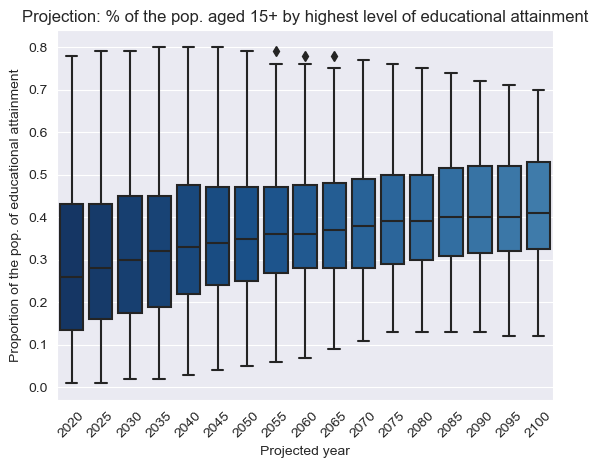

In [7]:
edStatsData_prj_bp = edStatsData_prj.iloc[:, edStatsData_prj.columns.get_loc('2020'):edStatsData_prj.columns.get_loc('2100')+1]

sns.set_style("darkgrid")
sns.boxplot(data=edStatsData_prj_bp, palette=sns.color_palette('Blues_r', 56))
plt.xticks(rotation=45)
plt.title("Projection: % of the pop. aged 15+ by highest level of educational attainment")
plt.ylabel('Proportion of the pop. of educational attainment')
plt.xlabel('Projected year')
plt.show()

<div style="text-align: justify"> No obvious low outliers shown on the boxplot. </div> </br>
<div style="text-align: justify"> That can lead us to the third and last step on the management of the missing values; working on the missing values. As seen previously, there are no low outliers so we can proceed to the cleaning to drop all the columns that have no data (columns from 1970 to 2017). </div>

In [8]:
edStatsData_prj.reset_index(drop=True, inplace=True)
display(edStatsData_prj.head())

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,East Asia & Pacific,EAS,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,East Asia & Pacific (excluding high income),EAP,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Euro area,EMU,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Europe & Central Asia,ECS,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Check the proportion of missing values in the indicator data set (per row) from 2020 to 2100 as it's a
# projection indicator
edStatsData_prj.loc[:,'Missing values per row'] = edStatsData_prj.loc[:,'2020':'2100'].isna().mean(axis=1) 

print("number of columns between 1970 and 2100 : " + str(len(edStatsData_prj.columns[4:])-1))
#display(edStatsData_prj.sort_values(by='Missing values per row', ascending=False).head())
edStatsData_prj.isna().sum()

display(edStatsData_prj.head().sort_values(by='Missing values per row', ascending=False))

number of columns between 1970 and 2100 : 65


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Missing values per row
0,Arab World,ARB,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,East Asia & Pacific,EAS,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,East Asia & Pacific (excluding high income),EAP,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,Euro area,EMU,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,Europe & Central Asia,ECS,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [10]:
edStatsData_prj.loc[:,'2020':'2100'].shape

(242, 17)

<div style="text-align: justify"> Another good method to visualize missing values is using the missingno Python library to identify and visualize missing data. Usually used prior to Machine Learning, we can use the matrix method of this library for our study case. </div>

<AxesSubplot:>

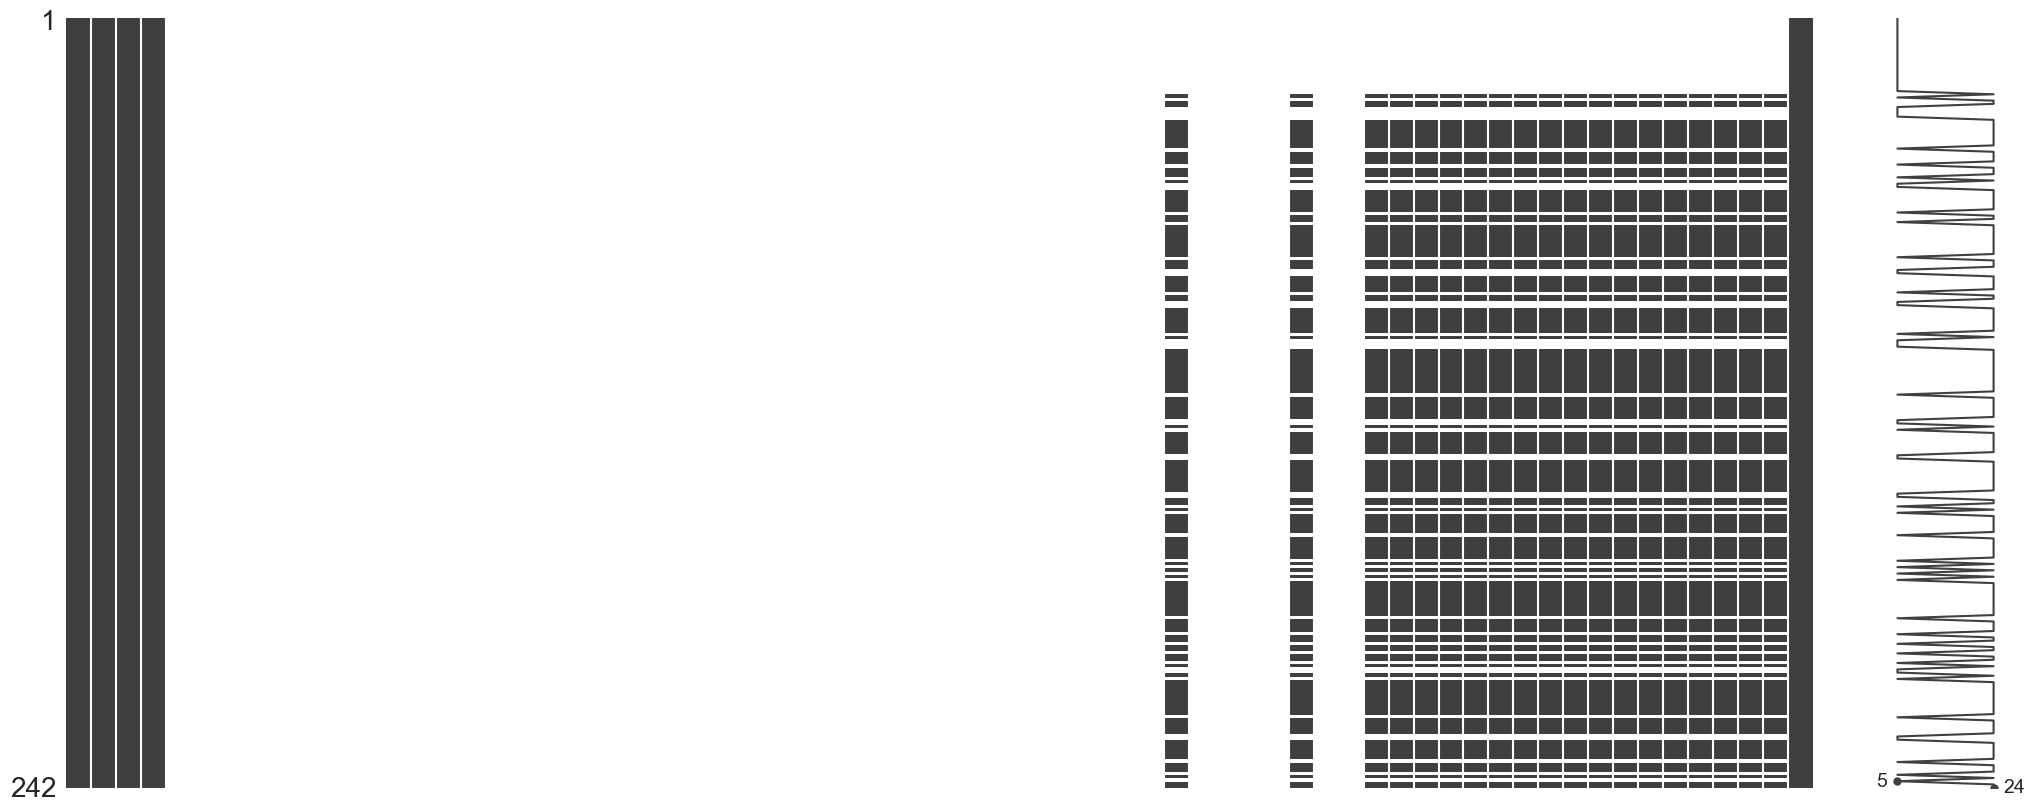

In [11]:
msno.matrix(edStatsData_prj)

<div style="text-align: justify"> As shown above, the white spot is a missing value and a dark spot is a data. As expected, the columns from 1970 to 2017 are full of missing values (expected for 2 dates). I decide to drop all the rows that have not at least 2 values (I assume that we are able to work with rows that have at least 2 data) on its data before 2020 to 2100 which is equal to 88% of missing values. </div>

In [12]:
edStatsData_prj = edStatsData_prj.loc[edStatsData_prj['Missing values per row'] <= 0.88]
display(edStatsData_prj.loc[:,'2020':'2100'].isna().sum())
display(edStatsData_prj.head().sort_values(by='Missing values per row', ascending=False))

2020    0
2025    0
2030    0
2035    0
2040    0
2045    0
2050    0
2055    0
2060    0
2065    0
2070    0
2075    0
2080    0
2085    0
2090    0
2095    0
2100    0
dtype: int64

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Missing values per row
24,World,WLD,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,0.38,0.39,0.40,0.41,0.42,0.42,0.43,0.43,0.43,0.0
26,Albania,ALB,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,0.62,0.63,0.65,0.65,0.66,0.67,0.67,0.67,0.67,0.0
27,Algeria,DZA,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,0.48,0.48,0.49,0.49,0.49,0.49,0.48,0.47,0.46,0.0
32,Argentina,ARG,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,0.46,0.46,0.47,0.47,0.47,0.48,0.47,0.47,0.47,0.0
33,Armenia,ARM,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,0.67,0.66,0.65,0.64,0.63,0.62,0.60,0.59,0.58,0.0


<div style="text-align: justify"> We call once again the matrix method from missingno library to have a visual of the missing values. </div>

<AxesSubplot:>

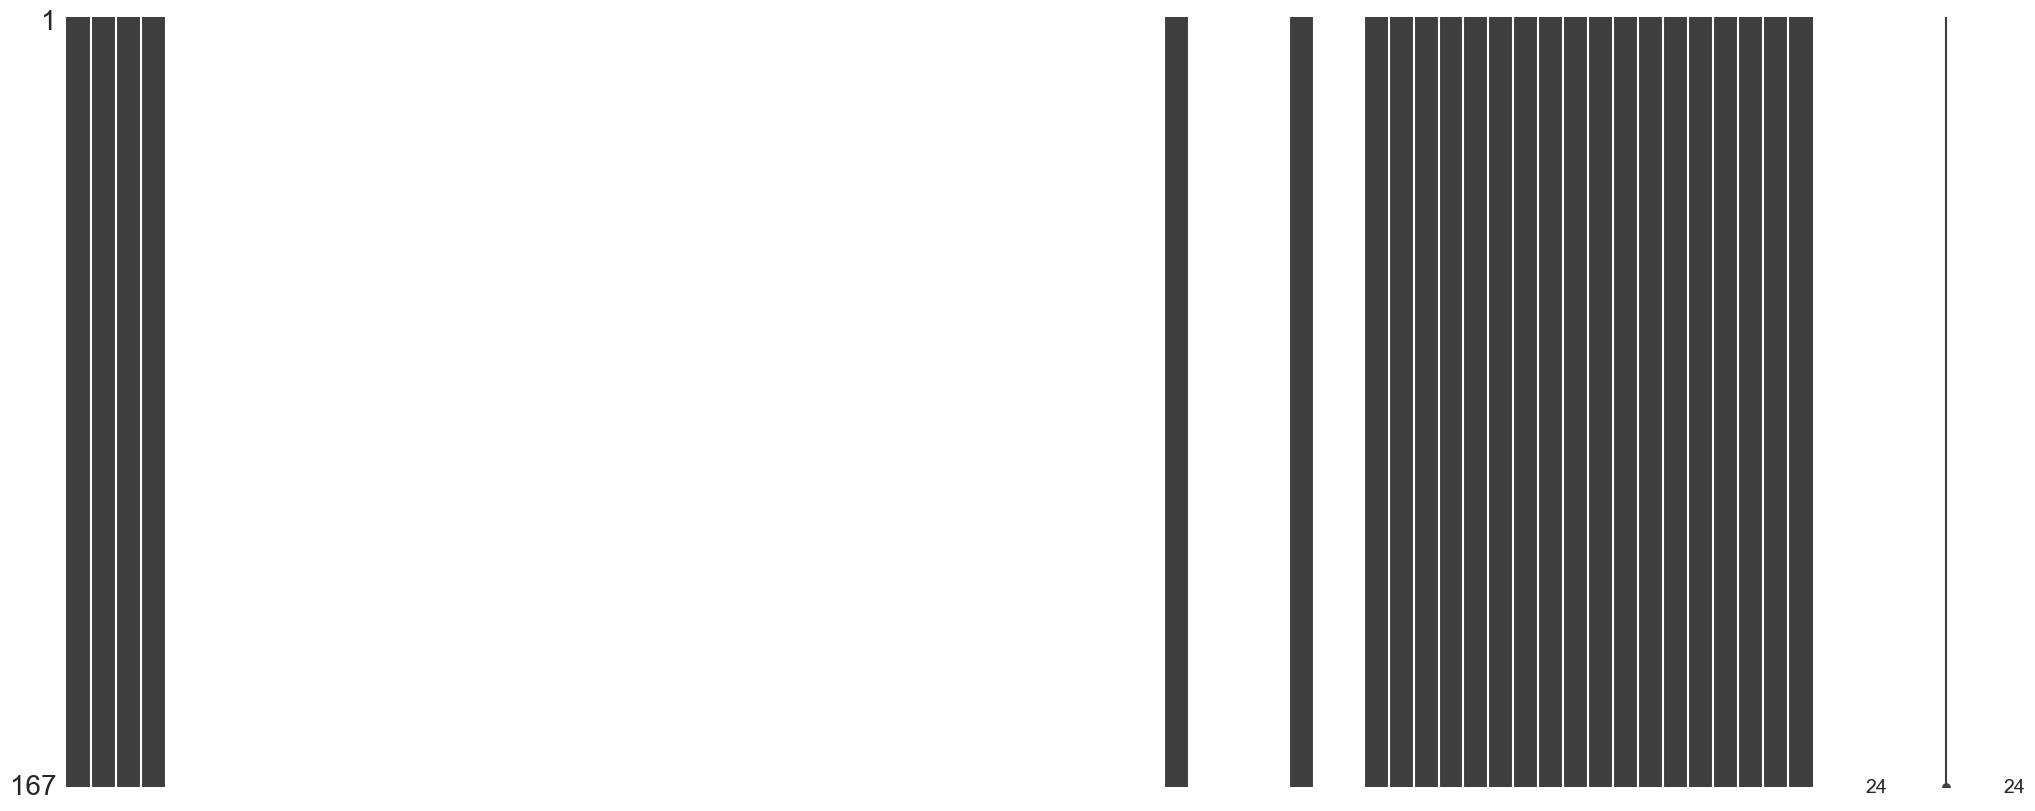

In [13]:
# Using the matrix method to visualise the mv of the DF
msno.matrix(edStatsData_prj)

In [14]:
# Dropping columns from 1970 to 2017
edStatsData_prj.drop(edStatsData_prj.loc[:, '1970':'2017'], axis = 1, inplace=True)

number of missing values : 0


<AxesSubplot:>

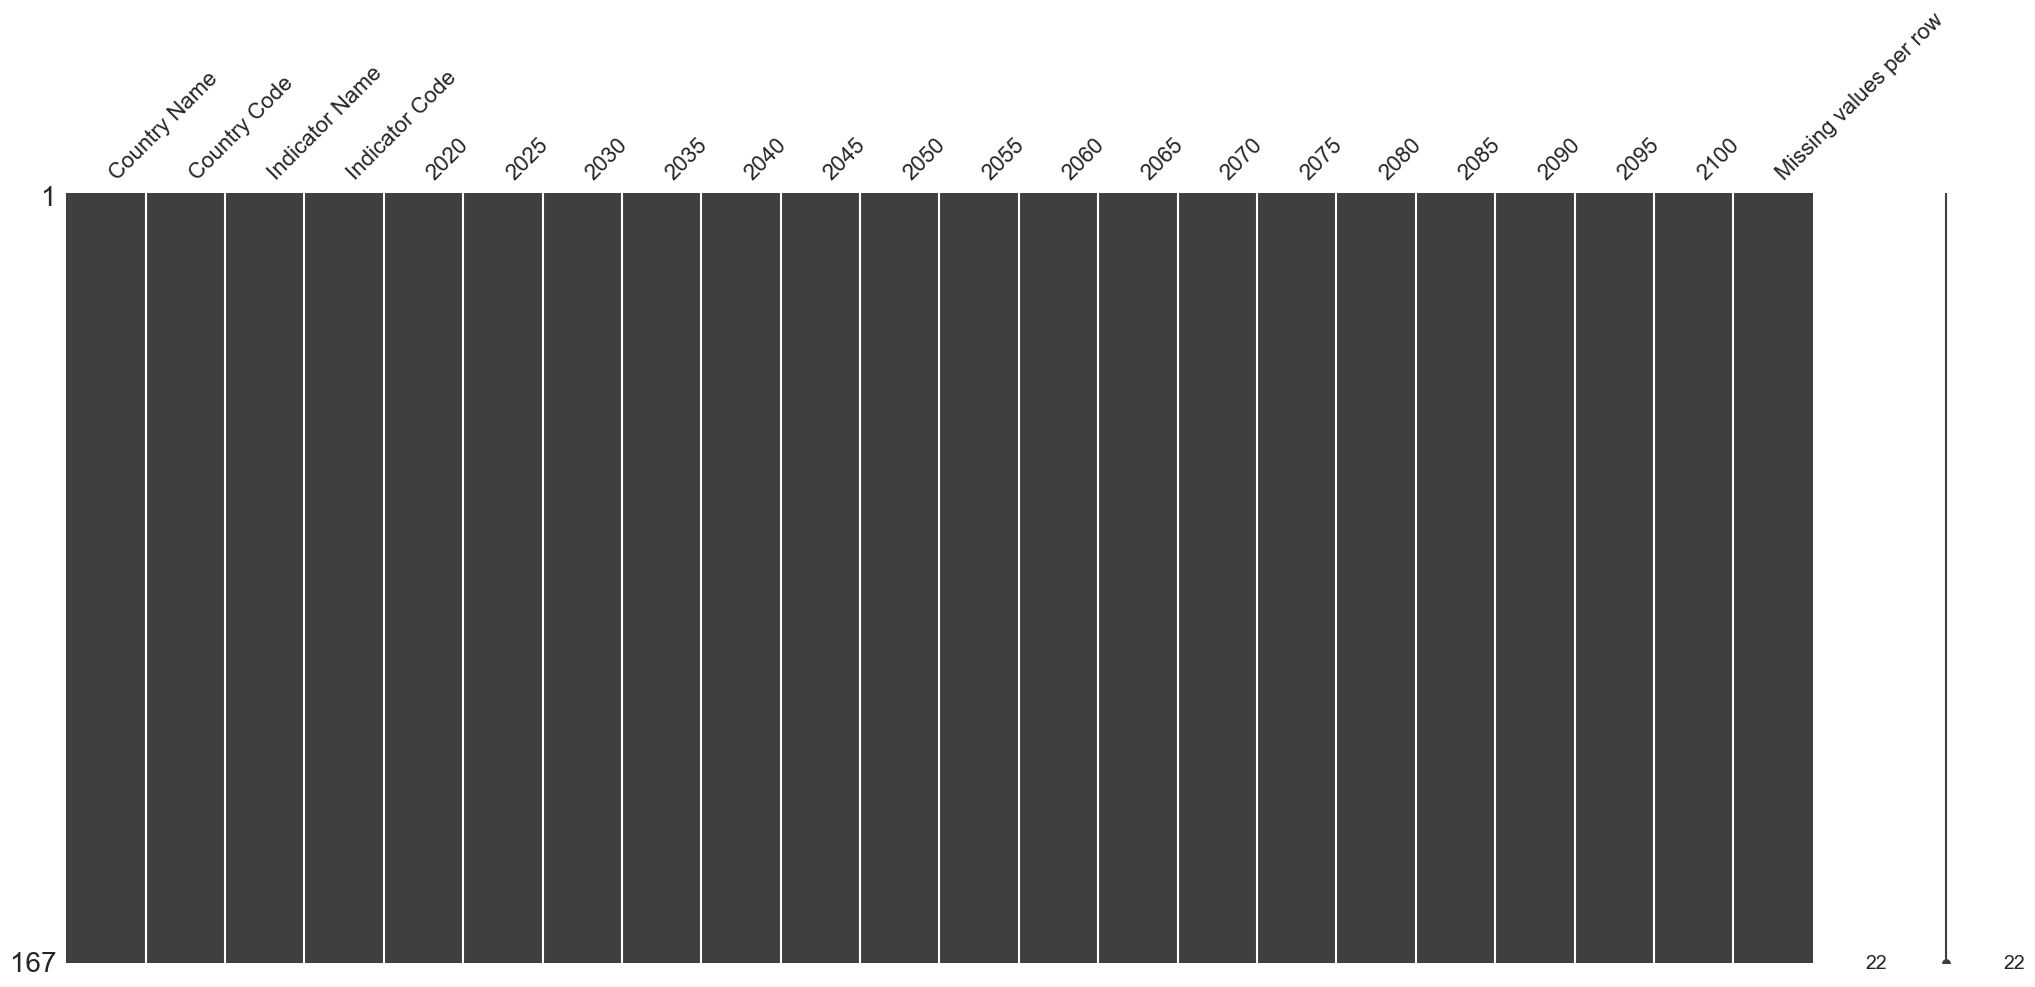

In [15]:
# Using the matrix method to visualise the mv of the DF
print("number of missing values : " + str(edStatsData_prj.isna().sum().sum()))
msno.matrix(edStatsData_prj)

In [16]:
# Check for duplicates
edStatsData_prj.duplicated(subset=['Country Name']).sum()

0

In [17]:
edStatsData_prj.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,2045,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Missing values per row
24,World,WLD,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.28,0.29,0.31,0.32,0.33,0.35,...,0.38,0.39,0.40,0.41,0.42,0.42,0.43,0.43,0.43,0.0
26,Albania,ALB,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.43,0.46,0.49,0.52,0.54,0.56,...,0.62,0.63,0.65,0.65,0.66,0.67,0.67,0.67,0.67,0.0
27,Algeria,DZA,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.32,0.35,0.38,0.40,0.42,0.44,...,0.48,0.48,0.49,0.49,0.49,0.49,0.48,0.47,0.46,0.0
32,Argentina,ARG,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.34,0.36,0.38,0.39,0.41,0.42,...,0.46,0.46,0.47,0.47,0.47,0.48,0.47,0.47,0.47,0.0
33,Armenia,ARM,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.67,0.68,0.69,0.69,0.69,0.69,...,0.67,0.66,0.65,0.64,0.63,0.62,0.60,0.59,0.58,0.0


<div style="text-align: justify"> After different manipulations of the dataset (filtering, dropping, checking for duplicates), it ended to a dataset with no missing values and duplicates. The analysis of the projection indicator can now being proceeded. </div>

## Data manipulation of the projection indicator

<div style="text-align: justify"> Now that the subset of <em>EdStatsData</em> dataset is cleaned and ready to be manipulated, the merge between it and <em>EdStatsCountry</em> needs to be performed before doing some analysis. To merge the datasets, the method merge() has to be called using a right merge. </div>

In [18]:
edStatsData_prj_merged = pd.merge(edStatsCountry[['Country Code', 'Region']], edStatsData_prj, on='Country Code',
                              how='right')
display(edStatsData_prj_merged.head())
edStatsData_prj_merged['Indicator Name'].unique();

,Country Code,Region,Country Name,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Missing values per row
0,WLD,NaN,World,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.28,0.29,0.31,0.32,0.33,...,0.38,0.39,0.40,0.41,0.42,0.42,0.43,0.43,0.43,0.0
1,ALB,Europe & Central Asia,Albania,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.43,0.46,0.49,0.52,0.54,...,0.62,0.63,0.65,0.65,0.66,0.67,0.67,0.67,0.67,0.0
2,DZA,Middle East & North Africa,Algeria,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.32,0.35,0.38,0.40,0.42,...,0.48,0.48,0.49,0.49,0.49,0.49,0.48,0.47,0.46,0.0
3,ARG,Latin America & Caribbean,Argentina,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.34,0.36,0.38,0.39,0.41,...,0.46,0.46,0.47,0.47,0.47,0.48,0.47,0.47,0.47,0.0
4,ARM,Europe & Central Asia,Armenia,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.67,0.68,0.69,0.69,0.69,...,0.67,0.66,0.65,0.64,0.63,0.62,0.60,0.59,0.58,0.0


In [19]:
# Dropping the missing values per row column
edStatsData_prj_merged.drop('Missing values per row', axis=1, inplace=True)

In [20]:
# Dropping the 0 index row (WLD, not useful)
edStatsData_prj_merged = edStatsData_prj_merged.iloc[1:]

In [21]:
# Checking the missing values if any on the new merged DF
edStatsData_prj_merged.isna().sum()

Country Code      0
Region            0
Country Name      0
Indicator Name    0
Indicator Code    0
2020              0
2025              0
2030              0
2035              0
2040              0
2045              0
2050              0
2055              0
2060              0
2065              0
2070              0
2075              0
2080              0
2085              0
2090              0
2095              0
2100              0
dtype: int64

In [22]:
edStatsData_prj_merged.head()

,Country Code,Region,Country Name,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
1,ALB,Europe & Central Asia,Albania,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.43,0.46,0.49,0.52,0.54,...,0.60,0.62,0.63,0.65,0.65,0.66,0.67,0.67,0.67,0.67
2,DZA,Middle East & North Africa,Algeria,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.32,0.35,0.38,0.40,0.42,...,0.47,0.48,0.48,0.49,0.49,0.49,0.49,0.48,0.47,0.46
3,ARG,Latin America & Caribbean,Argentina,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.34,0.36,0.38,0.39,0.41,...,0.45,0.46,0.46,0.47,0.47,0.47,0.48,0.47,0.47,0.47
4,ARM,Europe & Central Asia,Armenia,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.67,0.68,0.69,0.69,0.69,...,0.68,0.67,0.66,0.65,0.64,0.63,0.62,0.60,0.59,0.58
5,ABW,Latin America & Caribbean,Aruba,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.14,0.14,0.15,0.16,0.17,...,0.20,0.21,0.21,0.22,0.22,0.23,0.23,0.23,0.23,0.23


<div style="text-align: justify"> After merging two datasets, it's always a good habit to check if there are still missing values on the new dataset. As seen above, there was a missing value on the Region column but hopefully, the missing value on a row that we don't need so we just dropped it. </div>

## Analysis of the projection indicator

<a id='clc_stat'></a>
<a id='disp_graph_ind'></a>
<div style="text-align: justify"> Using this projected indicator, we can analyze which region is most likely to have countries with high potential of customers to fulfill our services. </div> </br>

<div style="text-align: justify"> It has been asked to calculate some statistic measurements (the mean, median and standard deviation) for each of the region. To do so, two functions have been created : <em>clc_stat</em> and <em>disp_graph_ind</em>, it calculates the desired statistic and plots the result respectively. </div>

In [23]:
def clc_stat(df, func):
    """clc_stat groups countries by Region, compute with the function func passed as arg
    
    Parameters:
    df (DataFrame): a DataFrame
    func (Function): a statistic function (mean, median or std)
    
    Returns:
    DataFrame: Returns the same DataFrame df grouped and computed with func
    
    """
    try:
        if (isinstance(df, pd.DataFrame)) & (callable(func)):
            df_grouped = func(df.groupby('Region'))
            display(df_grouped.head())
    except TypeError:
        print("TypeError: Check your input arguments.")
        
    return df_grouped


In [24]:
def disp_graph_ind(df, stat, ind):
    """disp_graph_ind generates a lineplot for an indicator
    
    Parameters:
    df (DataFrame): a DataFrame
    stat          : the statistic you want to calculate
    ind           : the indicator used
    
    """
    try:
        if (isinstance(df, pd.DataFrame) & isinstance(stat, str)):
            sns.set_style("darkgrid")
            fig, ax = plt.subplots()

            fig.set_figwidth(15)
            sns.lineplot(data=df)
            if (ind == 'PRJ.ATT.15UP.3.MF'):
                plt.ylabel(stat + ' [%]')
                plt.title(stat +' of the % of the pop. age 15+ by highest level of educational attainment')
            elif (ind == 'NY.GDP.PCAP.CD'):
                plt.ylabel(stat + ' [in $]')
                plt.yscale('log')
                plt.title(stat +' of the GDP per capita (current US$)')
            elif (ind == 'SP.POP.1524.TO.UN'):
                plt.ylabel(stat + ' [in persons]')
                plt.yscale('log')
                plt.title(stat +' of the population, ages 15-24')
            else:
                plt.ylabel(stat + ' [per 100 people]')
                plt.title(stat +' of personal computers (per 100 people)')
            plt.xlabel('Year')
            plt.xticks(rotation=90)
            ax.legend(bbox_to_anchor=(1.05, 1.013))
            plt.show()
    except TypeError:
        print("TypeError: Check your input arguments.")


In [25]:
# Retrieving the Indicator code for the plot settings
ind = edStatsData_prj_merged['Indicator Code'].iloc[0]

<div style="text-align: justify"> Starting with a measurement of center : the mean. </div>

,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Region,,,,,,,,,,,,,,,,,
East Asia & Pacific,0.289565,0.303478,0.315652,0.326957,0.336957,0.345652,0.350870,0.356957,0.362174,0.366522,0.369565,0.371304,0.373043,0.374348,0.374783,0.373043,0.371739
Europe & Central Asia,0.500638,0.510426,0.520638,0.525745,0.530213,0.532128,0.531489,0.529787,0.527234,0.522340,0.515745,0.509362,0.502340,0.492553,0.483830,0.474894,0.464894
Latin America & Caribbean,0.242000,0.260000,0.277333,0.294333,0.308667,0.324667,0.340333,0.354333,0.365667,0.377333,0.387000,0.395667,0.402333,0.409333,0.414000,0.416667,0.418333
Middle East & North Africa,0.254118,0.271176,0.288235,0.302353,0.314118,0.325294,0.334118,0.344706,0.350588,0.354706,0.357647,0.361176,0.362353,0.362353,0.360588,0.358235,0.353529
North America,0.425000,0.420000,0.410000,0.405000,0.400000,0.390000,0.380000,0.370000,0.360000,0.350000,0.345000,0.335000,0.325000,0.315000,0.310000,0.300000,0.290000


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
2020,0.289565,0.500638,0.242000,0.254118,0.425,0.168333,0.118780
2025,0.303478,0.510426,0.260000,0.271176,0.420,0.188333,0.136585
2030,0.315652,0.520638,0.277333,0.288235,0.410,0.211667,0.156098
2035,0.326957,0.525745,0.294333,0.302353,0.405,0.228333,0.175122
2040,0.336957,0.530213,0.308667,0.314118,0.400,0.251667,0.197561
2045,0.345652,0.532128,0.324667,0.325294,0.390,0.271667,0.218293
2050,0.350870,0.531489,0.340333,0.334118,0.380,0.293333,0.240488
2055,0.356957,0.529787,0.354333,0.344706,0.370,0.310000,0.262439
2060,0.362174,0.527234,0.365667,0.350588,0.360,0.333333,0.285122
2065,0.366522,0.522340,0.377333,0.354706,0.350,0.350000,0.307561


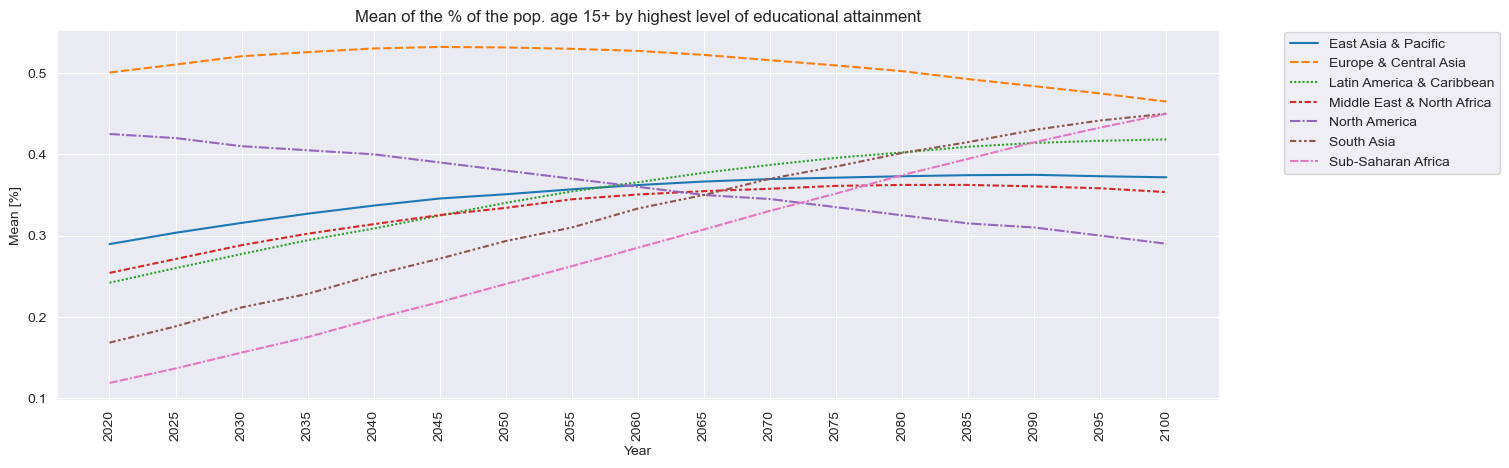

In [26]:
# Using the clc_stat function to calculate the mean
edStatsData_prj_m_grouped_mean = clc_stat(edStatsData_prj_merged, pd.core.groupby.SeriesGroupBy.mean)

# Transposing the DF prior its plot
edStatsData_prj_m_g_mean_t = edStatsData_prj_m_grouped_mean.transpose()
display(edStatsData_prj_m_g_mean_t)

# Calling disp_graph_ind takes generates a lineplot to visualize the evolution of each region over the years
disp_graph_ind(edStatsData_prj_m_g_mean_t, 'Mean', ind)

<div style="text-align: justify"> According to the graph of means for each region, the Europe and Central Asia seems to have a higher percentage of the population aged 15+ by highest level of educational attainment but it tends to decrease over the year starting from around 2060. In contrast to Europe and Central Asia, South Asia and Sub-Saharan Africa tend to increase constantly regardless of the tilt of the slope. </div> </br>

<div style="text-align: justify"> Altough these regions have a lower percentage of the population aged 15+ by highest level of educational attainment maybe it should a good option to pick these regions instead of Europe in the far future (later 2100) as we see in the graph that the means tend to get closer. </div> </br>

<div style="text-align: justify"> Calculate another measurement of the center : the median. </div>

,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Region,,,,,,,,,,,,,,,,,
East Asia & Pacific,0.270,0.29,0.330,0.350,0.34,0.320,0.31,0.330,0.35,0.35,0.350,0.360,0.370,0.380,0.37,0.36,0.36
Europe & Central Asia,0.490,0.49,0.500,0.520,0.53,0.530,0.53,0.530,0.52,0.51,0.500,0.510,0.520,0.520,0.52,0.51,0.49
Latin America & Caribbean,0.225,0.24,0.255,0.270,0.29,0.325,0.35,0.365,0.37,0.37,0.375,0.380,0.390,0.400,0.40,0.40,0.41
Middle East & North Africa,0.260,0.28,0.300,0.300,0.30,0.300,0.31,0.320,0.33,0.33,0.330,0.340,0.350,0.350,0.36,0.36,0.37
North America,0.425,0.42,0.410,0.405,0.40,0.390,0.38,0.370,0.36,0.35,0.345,0.335,0.325,0.315,0.31,0.30,0.29


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
2020,0.27,0.49,0.225,0.26,0.425,0.155,0.09
2025,0.29,0.49,0.240,0.28,0.420,0.170,0.11
2030,0.33,0.50,0.255,0.30,0.410,0.195,0.12
2035,0.35,0.52,0.270,0.30,0.405,0.210,0.13
2040,0.34,0.53,0.290,0.30,0.400,0.230,0.15
2045,0.32,0.53,0.325,0.30,0.390,0.250,0.17
2050,0.31,0.53,0.350,0.31,0.380,0.275,0.18
2055,0.33,0.53,0.365,0.32,0.370,0.290,0.21
2060,0.35,0.52,0.370,0.33,0.360,0.320,0.24
2065,0.35,0.51,0.370,0.33,0.350,0.340,0.27


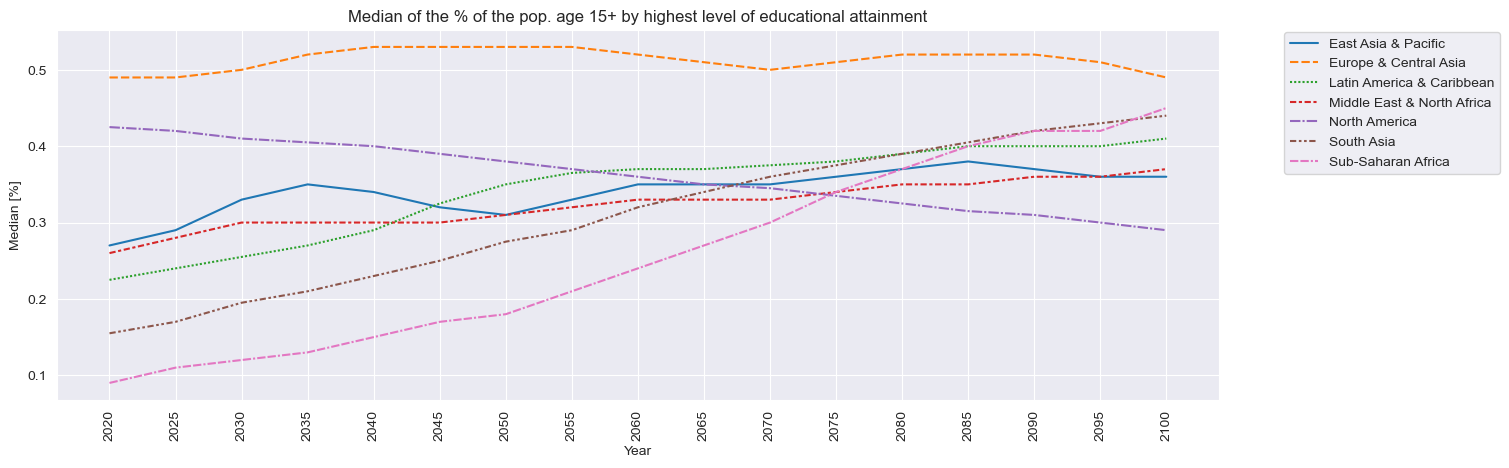

In [27]:
# Using the clc_stat function to calculate the median, transpose the DF and using disp_graph_ind to plot it
edStatsData_prj_m_grouped_med = clc_stat(edStatsData_prj_merged, pd.core.groupby.SeriesGroupBy.median)
edStatsData_prj_m_g_med_t = edStatsData_prj_m_grouped_med.transpose()
display(edStatsData_prj_m_g_med_t)

disp_graph_ind(edStatsData_prj_m_g_med_t, 'Median', ind)

<div style="text-align: justify"> Calculate a measure of spread : the standard deviation. </div>

,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Region,,,,,,,,,,,,,,,,,
East Asia & Pacific,0.135830,0.133471,0.129363,0.126794,0.126614,0.125112,0.123396,0.122379,0.122287,0.121865,0.122900,0.123925,0.125533,0.127344,0.129925,0.134213,0.136003
Europe & Central Asia,0.155331,0.155800,0.156725,0.159452,0.159340,0.160799,0.161904,0.162434,0.164841,0.165598,0.165539,0.166085,0.166697,0.165233,0.164046,0.162760,0.161432
Latin America & Caribbean,0.106816,0.107863,0.109511,0.109912,0.108556,0.109568,0.108230,0.106986,0.107115,0.107477,0.105998,0.106080,0.104772,0.106316,0.105130,0.104331,0.103893
Middle East & North Africa,0.096051,0.098481,0.100700,0.101645,0.103625,0.102477,0.101308,0.101681,0.100528,0.097796,0.096211,0.095909,0.094573,0.092974,0.093037,0.090777,0.089718
North America,0.106066,0.113137,0.113137,0.106066,0.113137,0.113137,0.113137,0.113137,0.113137,0.113137,0.120208,0.120208,0.120208,0.120208,0.113137,0.113137,0.113137


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
2020,0.135830,0.155331,0.106816,0.096051,0.106066,0.116862,0.103904
2025,0.133471,0.155800,0.107863,0.098481,0.113137,0.129061,0.113570
2030,0.129363,0.156725,0.109511,0.100700,0.113137,0.137465,0.122880
2035,0.126794,0.159452,0.109912,0.101645,0.106066,0.145385,0.131342
2040,0.126614,0.159340,0.108556,0.103625,0.113137,0.153286,0.137582
2045,0.125112,0.160799,0.109568,0.102477,0.113137,0.160676,0.142283
2050,0.123396,0.161904,0.108230,0.101308,0.113137,0.161699,0.145395
2055,0.122379,0.162434,0.106986,0.101681,0.113137,0.169706,0.148337
2060,0.122287,0.164841,0.107115,0.100528,0.113137,0.169312,0.148797
2065,0.121865,0.165598,0.107477,0.097796,0.113137,0.173090,0.148691


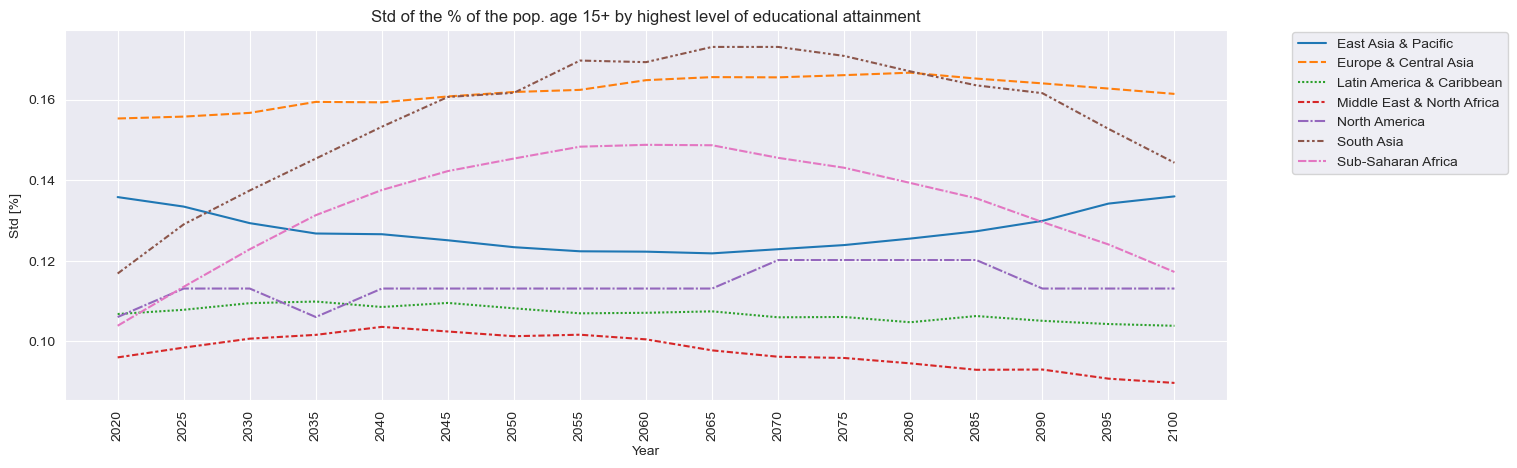

In [28]:
# Using the clc_stat function to calculate the std, transpose the DF and using disp_graph_ind to plot it
edStatsData_prj_m_grouped_std = clc_stat(edStatsData_prj_merged, pd.core.groupby.SeriesGroupBy.std)
edStatsData_prj_m_g_std_t = edStatsData_prj_m_grouped_std.transpose()
display(edStatsData_prj_m_g_std_t)

disp_graph_ind(edStatsData_prj_m_g_std_t, 'Std', ind)

<a id='add_mean_med_std_cols'></a>
<a id='disp_sp_ind'></a>
<div style="text-align: justify"> After the analysis by region, a narrower analysis can be performed to focus on which specific countries into a region are the most likely to match with our expectations. The same process of measuring the center and the spread will be performed. </div> </br>

<div style="text-align: justify"> But first, two functions are developped; <em>add_mean_med_std_cols</em> and <em>disp_sp_ind</em> which create 3 columns that contain the mean, median and standard deviation per country (per row) and displays a scatterplot of the standard deviation against the mean, respectively.</div>

In [29]:
# Creating a function that add mean, median and std per country columns
def add_mean_med_std_cols(df):
    """add_mean_med_std_cols returns the same DataFrame df with mean, median and std columns added
    
    Parameters:
    df (DataFrame): a DataFrame
    
    Returns:
    DataFrame: Returns a DataFrame that only contains the cols mean, median and std
    
    """
    try:
        if isinstance(df, pd.DataFrame):
            df.loc[:, 'Mean per country'] = df.mean(numeric_only=True, axis=1)
            df.loc[:, 'Median per country'] = df.median(numeric_only=True, axis=1)
            df.loc[:, 'Std per country'] = df.std(numeric_only=True, axis=1, ddof=0)
            
    except TypeError:
        print("TypeError: Check your input arguments.")
        
    return df

In [30]:
# Creating a function that generate a scatterplot with all details setup
def disp_sp_ind(df, ind, log=True):
    """disp_sp_ind generates a scatterplot between the mean and std cols
    
    Parameters:
    df (DataFrame): a DataFrame
    ind           : the indicator used
    log           : a parameter that allows the user to set the plot in log scale or not
    
    """
    try:
        if (isinstance(df, pd.DataFrame) & isinstance(ind, str)):
            fig, ax = plt.subplots()

            sns.scatterplot(data=df, x="Mean per country", y="Std per country",
                            hue="Region", size="Region", sizes=(10, 170), palette='rocket')
            ax.legend(bbox_to_anchor=(1.05, 1.013))
            if(log):
                plt.yscale('log')
                plt.xscale('log')
                
            if (ind == 'PRJ.ATT.15UP.3.MF'):
                plt.title('Std VS Mean of the % of the pop. age 15+ of highest lvl ed.')
            elif (ind == 'NY.GDP.PCAP.CD'):
                plt.title('Std VS Mean of the GDP per capita (current US$)')
            elif (ind == 'IT.CMP.PCMP.P2'):
                plt.title('Std VS Mean of personal computers (per 100 people)')
            else:
                plt.title('Std VS Mean of the population, ages 15-24')
                
            plt.show()
    except TypeError:
        print("TypeError: Check your input arguments.")
        

In [31]:
edStatsData_prj_merged = add_mean_med_std_cols(edStatsData_prj_merged)
edStatsData_prj_merged.head()

,Country Code,Region,Country Name,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,...,2070,2075,2080,2085,2090,2095,2100,Mean per country,Median per country,Std per country
1,ALB,Europe & Central Asia,Albania,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.43,0.46,0.49,0.52,0.54,...,0.65,0.65,0.66,0.67,0.67,0.67,0.67,0.592353,0.610,0.073054
2,DZA,Middle East & North Africa,Algeria,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.32,0.35,0.38,0.40,0.42,...,0.49,0.49,0.49,0.49,0.48,0.47,0.46,0.444706,0.465,0.048782
3,ARG,Latin America & Caribbean,Argentina,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.34,0.36,0.38,0.39,0.41,...,0.47,0.47,0.47,0.48,0.47,0.47,0.47,0.435882,0.455,0.040884
4,ARM,Europe & Central Asia,Armenia,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.67,0.68,0.69,0.69,0.69,...,0.65,0.64,0.63,0.62,0.60,0.59,0.58,0.653529,0.665,0.034269
5,ABW,Latin America & Caribbean,Aruba,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.14,0.14,0.15,0.16,0.17,...,0.22,0.22,0.23,0.23,0.23,0.23,0.23,0.196471,0.205,0.030828


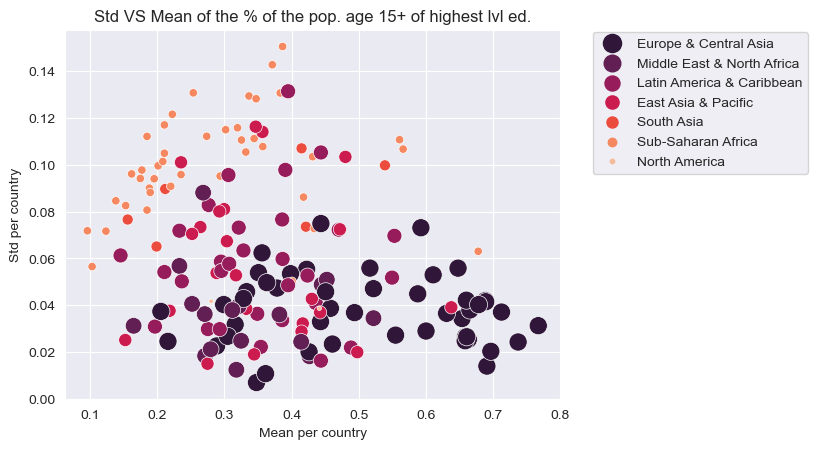

In [32]:
disp_sp_ind(edStatsData_prj_merged, 'PRJ.ATT.15UP.3.MF', log=False)

<div style="text-align: justify"> Regarding the scatterplot, the countries that are the most potential for our study are in the Europe &amp; Central Asia. Showing the head of the dataframe sorted by the mean per country and the standard deviation per country gives us an overwiew of the European and Central Asian countries that have a high mean and a low standard deviation. </div>

In [33]:
edStatsData_prj_merged.sort_values(by=['Mean per country', 'Std per country'], ascending=[False, False]).head(15)

,Country Code,Region,Country Name,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,...,2070,2075,2080,2085,2090,2095,2100,Mean per country,Median per country,Std per country
154,TKM,Europe & Central Asia,Turkmenistan,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.78,0.79,0.79,0.80,0.80,...,0.77,0.76,0.75,0.74,0.72,0.71,0.69,0.767059,0.780000,0.031214
81,KGZ,Europe & Central Asia,Kyrgyz Republic,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.74,0.74,0.75,0.76,0.76,...,0.74,0.74,0.73,0.71,0.70,0.69,0.68,0.737059,0.740000,0.024237
133,SVK,Europe & Central Asia,Slovak Republic,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.72,0.73,0.74,0.75,0.75,...,0.72,0.70,0.69,0.67,0.66,0.64,0.63,0.712353,0.725000,0.037033
146,TJK,Europe & Central Asia,Tajikistan,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.65,0.66,0.68,0.69,0.70,...,0.72,0.71,0.71,0.70,0.69,0.68,0.67,0.696471,0.700000,0.020261
8,AZE,Europe & Central Asia,Azerbaijan,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.66,0.67,0.68,0.68,0.69,...,0.70,0.70,0.70,0.69,0.69,0.68,0.67,0.690588,0.690294,0.013944
40,CZE,Europe & Central Asia,Czech Republic,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.72,0.72,0.73,0.73,0.73,...,0.69,0.67,0.66,0.64,0.63,0.61,0.60,0.688824,0.705000,0.041438
18,BIH,Europe & Central Asia,Bosnia and Herzegovina,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.58,0.61,0.63,0.65,0.67,...,0.73,0.73,0.73,0.72,0.71,0.70,0.69,0.688235,0.700000,0.041914
156,UKR,Europe & Central Asia,Ukraine,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.71,0.71,0.72,0.72,0.72,...,0.67,0.66,0.65,0.63,0.62,0.61,0.59,0.678235,0.695000,0.040206
166,ZWE,Sub-Saharan Africa,Zimbabwe,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.51,0.55,0.59,0.63,0.66,...,0.73,0.73,0.73,0.73,0.72,0.71,0.69,0.677647,0.705000,0.063002
123,ROU,Europe & Central Asia,Romania,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.56,0.59,0.62,0.64,0.66,...,0.70,0.70,0.70,0.69,0.68,0.67,0.66,0.665294,0.675000,0.037915


<div style="text-align: justify"> Nevertheless, the mean graph previously showed that this region will tend to decrease over years and our focus was onto South Asia and Sub-Saharan Africa regions. A quick filter on the region over the dataframe gives us the countries that have the highest potential for a study case in the appropriated regions. </div>

In [34]:
cond = (edStatsData_prj_merged['Region'] == 'South Asia') | (edStatsData_prj_merged['Region'] == 'Sub-Saharan Africa')
edStatsData_prj_merged.loc[cond, :].sort_values(by=['Mean per country', 'Std per country'], ascending=[False, False]).head(15)


,Country Code,Region,Country Name,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,...,2070,2075,2080,2085,2090,2095,2100,Mean per country,Median per country,Std per country
166,ZWE,Sub-Saharan Africa,Zimbabwe,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.51,0.55,0.59,0.63,0.66,...,0.73,0.73,0.73,0.73,0.72,0.71,0.69,0.677647,0.705000,0.063002
136,ZAF,Sub-Saharan Africa,South Africa,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.35,0.38,0.42,0.45,0.48,...,0.63,0.65,0.67,0.68,0.69,0.70,0.70,0.565882,0.580000,0.106672
78,KEN,Sub-Saharan Africa,Kenya,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.31,0.36,0.40,0.44,0.49,...,0.64,0.66,0.66,0.67,0.67,0.67,0.67,0.560588,0.595000,0.110695
106,NPL,South Asia,Nepal,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.32,0.36,0.40,0.43,0.47,...,0.61,0.62,0.63,0.64,0.65,0.65,0.65,0.538824,0.560000,0.099737
142,SWZ,Sub-Saharan Africa,Swaziland,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.25,0.29,0.33,0.37,0.40,...,0.49,0.50,0.50,0.49,0.49,0.48,0.47,0.433529,0.470000,0.072710
105,NAM,Sub-Saharan Africa,Namibia,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.22,0.25,0.29,0.32,0.35,...,0.50,0.51,0.53,0.54,0.55,0.56,0.56,0.431176,0.445588,0.103409
67,IND,South Asia,India,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.27,0.30,0.32,0.34,0.36,...,0.47,0.48,0.49,0.50,0.51,0.51,0.51,0.421176,0.430588,0.073506
46,GNQ,Sub-Saharan Africa,Equatorial Guinea,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.24,0.27,0.30,0.32,0.35,...,0.47,0.49,0.50,0.51,0.52,0.52,0.52,0.417647,0.430000,0.086161
114,PAK,South Asia,Pakistan,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.22,0.24,0.27,0.29,0.32,...,0.48,0.50,0.52,0.53,0.55,0.56,0.56,0.414706,0.422353,0.106987
112,NGA,Sub-Saharan Africa,Nigeria,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.27,0.30,0.33,0.36,0.39,...,0.45,0.45,0.44,0.43,0.42,0.41,0.40,0.400588,0.415000,0.050205


## Cleaning the standard indicators

<div style="text-align: justify"> Now that the projection indicator has been cleaned, analyzed and some insights have been retrieved, it is time to work on the other indicators. </div> </br>

<div style="text-align: justify"> The three standards indicators are the followings : </div>

- 'NY.GDP.PCAP.CD' : indicator of the GDP per capita (current US&#36;)
- 'IT.CMP.PCMP.P2' : indicator of the personal computers owners (per 100 people)
- 'SP.POP.1524.TO.UN' : indicator of the population, ages 15-24, total (male and female)

In [35]:
indicators = ['NY.GDP.PCAP.CD', 'IT.CMP.PCMP.P2', 'SP.POP.1524.TO.UN']
edStatsData_others = retrieve_indicator(edStatsData, indicators);

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
94107,Afghanistan,AFG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93709,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92870,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,157.187422,160.372836,136.117014,144.110319,174.942038,187.975604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97772,Albania,ALB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97374,Albania,ALB,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NY.GDP.PCAP.CD : (242, 69)
IT.CMP.PCMP.P2 : (242, 69)
SP.POP.1524.TO.UN : (242, 69)


<div style="text-align: justify"> As before, a check of the missing values (also the low outliers) has to be performed with a view to clean the dataset. The same steps to clean the dataset should be achieved once again for these indicators; check the types of dataset that are correctly converted when Python has loaded the CSV file, drop the columns that have no values, check the outliers and manage the missing values. </div>

In [36]:
edStatsData_others.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 1245 to 885747
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    726 non-null    object 
 1   Country Code    726 non-null    object 
 2   Indicator Name  726 non-null    object 
 3   Indicator Code  726 non-null    object 
 4   1970            147 non-null    float64
 5   1971            148 non-null    float64
 6   1972            148 non-null    float64
 7   1973            148 non-null    float64
 8   1974            148 non-null    float64
 9   1975            151 non-null    float64
 10  1976            152 non-null    float64
 11  1977            156 non-null    float64
 12  1978            155 non-null    float64
 13  1979            156 non-null    float64
 14  1980            167 non-null    float64
 15  1981            174 non-null    float64
 16  1982            174 non-null    float64
 17  1983            176 non-null 

In [37]:
# Through .info(), no value from 2017 to 2100 so we drop these columns
edStatsData_others.drop(edStatsData_others.loc[:,'2017':'2100'], axis=1, inplace=True)

In [38]:
display(edStatsData_others.head())
display(edStatsData_others.shape)
edStatsData_others.info()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1245,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,250.488643,283.248047,328.692870,406.804635,758.562998,817.393647,...,5046.817058,6255.761156,5267.552563,6032.961957,7005.479541,7571.402403,7715.998677,NaN,NaN,NaN
2084,Arab World,ARB,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2482,Arab World,ARB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4910,East Asia & Pacific,EAS,GDP per capita (current US$),NY.GDP.PCAP.CD,316.225712,341.976701,414.419302,534.343604,602.491430,647.331204,...,5664.143435,6495.933481,6648.004566,7679.834203,8844.822997,9402.722845,9447.701067,9665.056079,9541.871089,9787.775545
5749,East Asia & Pacific,EAS,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(726, 51)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 1245 to 885747
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    726 non-null    object 
 1   Country Code    726 non-null    object 
 2   Indicator Name  726 non-null    object 
 3   Indicator Code  726 non-null    object 
 4   1970            147 non-null    float64
 5   1971            148 non-null    float64
 6   1972            148 non-null    float64
 7   1973            148 non-null    float64
 8   1974            148 non-null    float64
 9   1975            151 non-null    float64
 10  1976            152 non-null    float64
 11  1977            156 non-null    float64
 12  1978            155 non-null    float64
 13  1979            156 non-null    float64
 14  1980            167 non-null    float64
 15  1981            174 non-null    float64
 16  1982            174 non-null    float64
 17  1983            176 non-null 

In [39]:
# Checking the proportion of missing values per row (per country)
edStatsData_others.loc[:,'Missing values per row'] = edStatsData_others.loc[:,'1970':'2016'].isna().mean(axis=1)
edStatsData_others.sort_values(by='Missing values per row', ascending=False)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Missing values per row
83112,Sub-Saharan Africa (excluding high income),SSA,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
64787,Middle income,MIC,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
328667,Faroe Islands,FRO,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
500524,Liberia,LBR,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
72117,OECD members,OED,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770895,Suriname,SUR,GDP per capita (current US$),NY.GDP.PCAP.CD,665.682665,726.337344,774.525751,828.844776,1009.589180,1282.213901,...,6858.163158,7443.850178,8303.313320,8318.976920,9272.413453,9484.568098,9564.406383,8724.723897,5871.442003,0.0
470365,"Korea, Rep.",KOR,GDP per capita (current US$),NY.GDP.PCAP.CD,279.125197,300.764837,323.596152,405.882927,561.567187,615.201419,...,20430.639460,18291.919598,22086.952919,24079.788524,24358.782176,25890.018670,27811.366384,27105.076226,27538.806128,0.0
767230,Sudan,SDN,GDP per capita (current US$),NY.GDP.PCAP.CD,175.001442,185.011170,194.737835,234.010498,291.745420,344.204807,...,1291.528826,1226.884381,1476.478087,1666.857757,1892.894352,1955.660799,2176.898029,2513.884661,2415.038162,0.0
496020,Lesotho,LSO,GDP per capita (current US$),NY.GDP.PCAP.CD,66.539495,72.532491,75.176833,110.241719,134.222129,129.980849,...,935.394139,924.105932,1169.267842,1350.677653,1281.620558,1192.998772,1218.466106,1152.319585,1039.704072,0.0


In [40]:
edStatsData_others.reset_index(drop=True, inplace=True)
edStatsData_others.loc[:,'1970':'2016'].shape

(726, 47)

<div style="text-align: justify"> We apply a filter on the subset dataset to drop all the rows that have at least 96% of missing values. Same as previously mentionned, at least 2 values of data per row are needed to be able to work with the row. </div>

In [41]:
edStatsData_others = edStatsData_others.loc[edStatsData_others['Missing values per row'] <= 0.96]
display(edStatsData_others.loc[:,'1970':'2016'].isna().mean())
display(edStatsData_others.sort_values(by='Missing values per row', ascending=False).head())

1970    0.770312
1971    0.768750
1972    0.768750
1973    0.768750
1974    0.768750
1975    0.764062
1976    0.762500
1977    0.756250
1978    0.757812
1979    0.756250
1980    0.739062
1981    0.728125
1982    0.728125
1983    0.725000
1984    0.723437
1985    0.714063
1986    0.710938
1987    0.703125
1988    0.625000
1989    0.620313
1990    0.278125
1991    0.271875
1992    0.264062
1993    0.246875
1994    0.220312
1995    0.178125
1996    0.164062
1997    0.139063
1998    0.089063
1999    0.075000
2000    0.060937
2001    0.028125
2002    0.023438
2003    0.026562
2004    0.025000
2005    0.039062
2006    0.165625
2007    0.282813
2008    0.318750
2009    0.357812
2010    0.360938
2011    0.360938
2012    0.367188
2013    0.365625
2014    0.375000
2015    0.376563
2016    0.670312
dtype: float64

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Missing values per row
416,Liechtenstein,LIE,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957447
103,Aruba,ABW,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957447
646,Tajikistan,TJK,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957447
76,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957447
183,Cayman Islands,CYM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957447


In [42]:
edStatsData_others['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [43]:
# Dropping all the rows that are considered as a country ('Country Name') but are not a country
erase = ['Arab World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'Euro area',
         'Europe & Central Asia', 'Europe & Central Asia (excluding high income)', 'European Union',
         'Heavily indebted poor countries (HIPC)', 'High income', 'Latin America & Caribbean',
         'Latin America & Caribbean (excluding high income)', 'Least developed countries: UN classification',
         'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa',
         'Middle East & North Africa (excluding high income)', 'Middle income', 'North America', 'OECD members',
         'South Asia', 'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)', 'Upper middle income',
         'World']

edStatsData_others = edStatsData_others.loc[~edStatsData_others['Country Name'].isin(erase),:];
edStatsData_others.sort_values(by='Country Code').head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Missing values per row
104,Aruba,ABW,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,13260.000000,13236.000000,13299.000000,13466.000000,13708.000000,13990.000000,14253.000000,14455.000000,NaN,0.446809
103,Aruba,ABW,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957447
102,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27546.899390,24631.434860,24271.940421,25324.720362,NaN,NaN,NaN,NaN,NaN,0.617021
75,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,157.187422,160.372836,136.117014,144.110319,174.942038,187.975604,...,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,569.577923,561.778746,0.404255
76,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957447


In [44]:
edStatsData_others.shape

(590, 52)

<a id='plt_bp'></a>
<div style="text-align: justify"> To avoid repetition on our code, a function is written to plot the outliers with all the figure setup pre-defined inside the function. </div>

In [45]:
def plt_bp(df, ind_name, log=True):
    """plt_bp displays a boxplot of an indicator to study the possible outliers
    
    Parameters:
    df (DataFrame): a DataFrame
    log           : a parameter that allows the user to set the plot in log scale or not
    
    """
    try:
        if (isinstance(df, pd.DataFrame) & (isinstance(ind_name, str))):
            plt.figure().set_figwidth(15)
            sns.boxplot(data=df, palette=sns.color_palette('Blues_r', 56))

            plt.title(ind_name)
            plt.ylabel(ind_name)
            plt.xlabel('Year')

            plt.xticks(rotation=90)
            if(log):
                plt.yscale('log')
            
            plt.show()
    except TypeError:
        print("TypeError: Check your input arguments.")
        

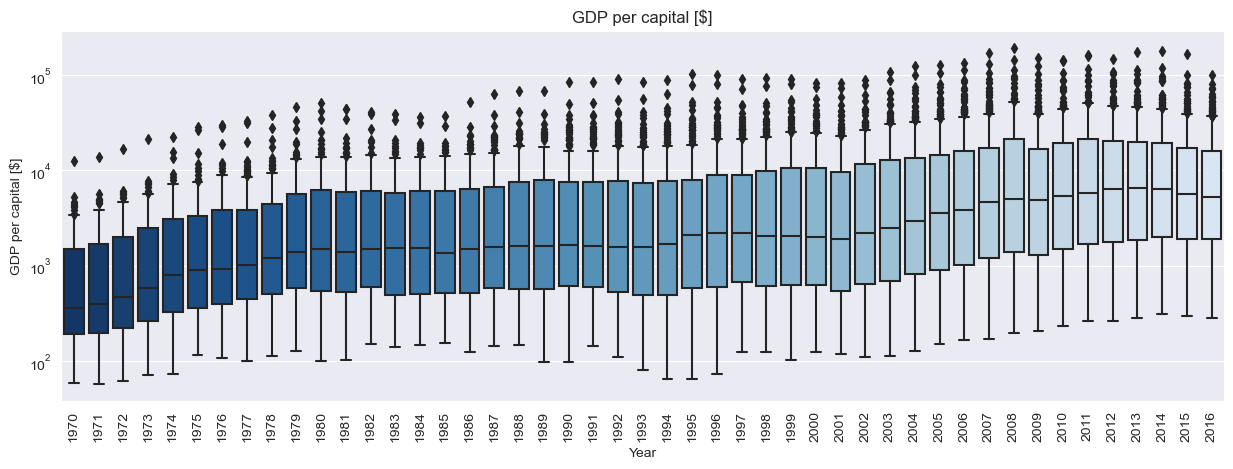

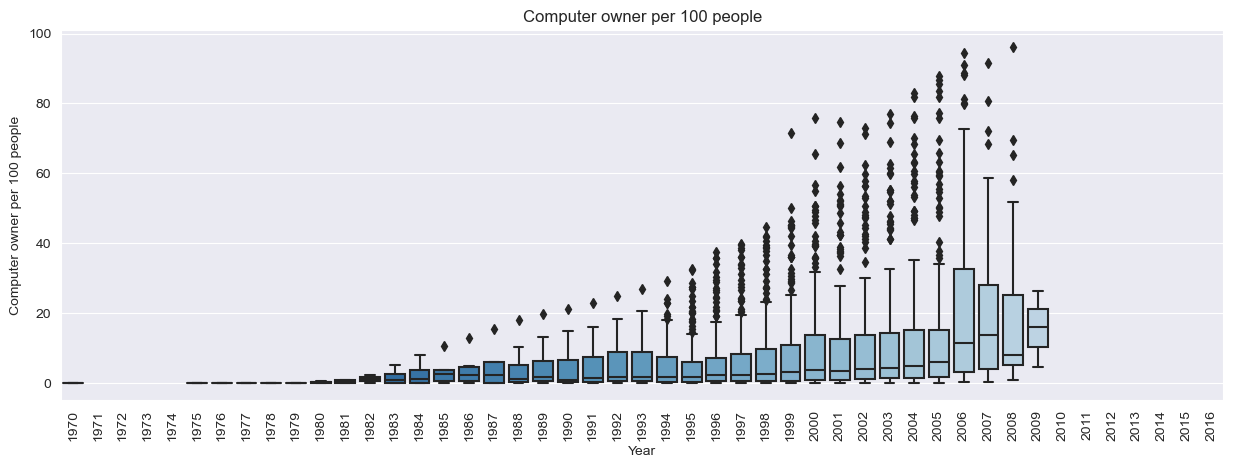

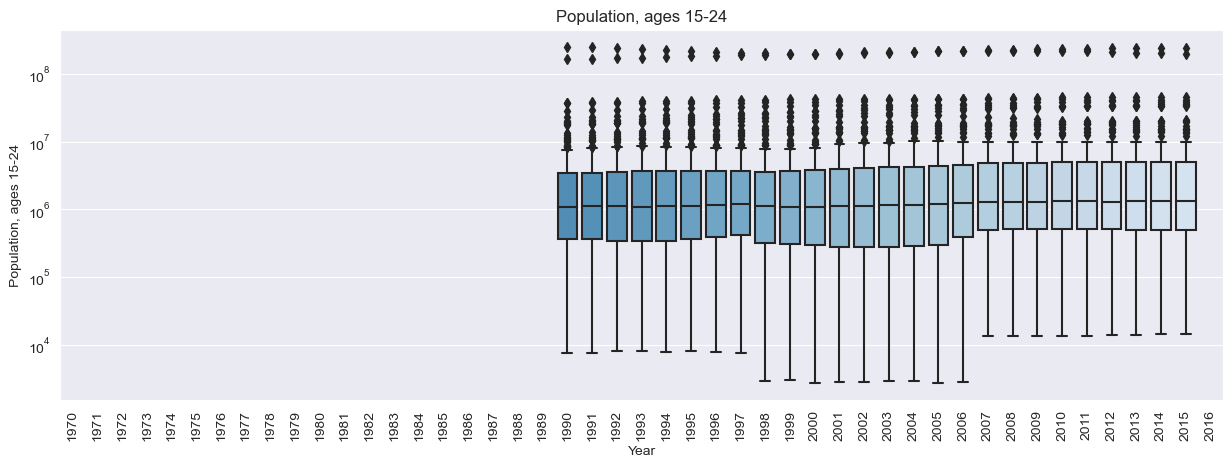

In [46]:
# GDP indicator
edStatsData_others_GDP_bp = edStatsData_others.loc[edStatsData_others['Indicator Code'] == 'NY.GDP.PCAP.CD',
                                               '1970':'2016']
plt_bp(edStatsData_others_GDP_bp, 'GDP per capital [$]')

# computer owner indicator
edStatsData_others_comp_bp = edStatsData_others.loc[edStatsData_others['Indicator Code'] == 'IT.CMP.PCMP.P2',
                                               '1970':'2016']
plt_bp(edStatsData_others_comp_bp, 'Computer owner per 100 people', log=False)

# population ages1524 indicator
edStatsData_others_pop1524_bp = edStatsData_others.loc[edStatsData_others['Indicator Code'] == 'SP.POP.1524.TO.UN',
                                               '1970':'2016']
plt_bp(edStatsData_others_pop1524_bp, 'Population, ages 15-24')

<div style="text-align: justify"> For a better visualization and understanding, the plot for the GDP per capita and the population ages 15-24 are plotted in a y-scale log. These plots show that there are no low outliers. </div>

In [47]:
edStatsData_others.reset_index(drop=True, inplace=True)
edStatsData_others;

In [48]:
edStatsData_others.isna().sum()

Country Name                0
Country Code                0
Indicator Name              0
Indicator Code              0
1970                      464
1971                      463
1972                      463
1973                      463
1974                      463
1975                      460
1976                      459
1977                      455
1978                      456
1979                      455
1980                      444
1981                      439
1982                      439
1983                      437
1984                      436
1985                      431
1986                      429
1987                      424
1988                      388
1989                      386
1990                      169
1991                      165
1992                      160
1993                      150
1994                      136
1995                      109
1996                      100
1997                       86
1998                       57
1999      

<AxesSubplot:>

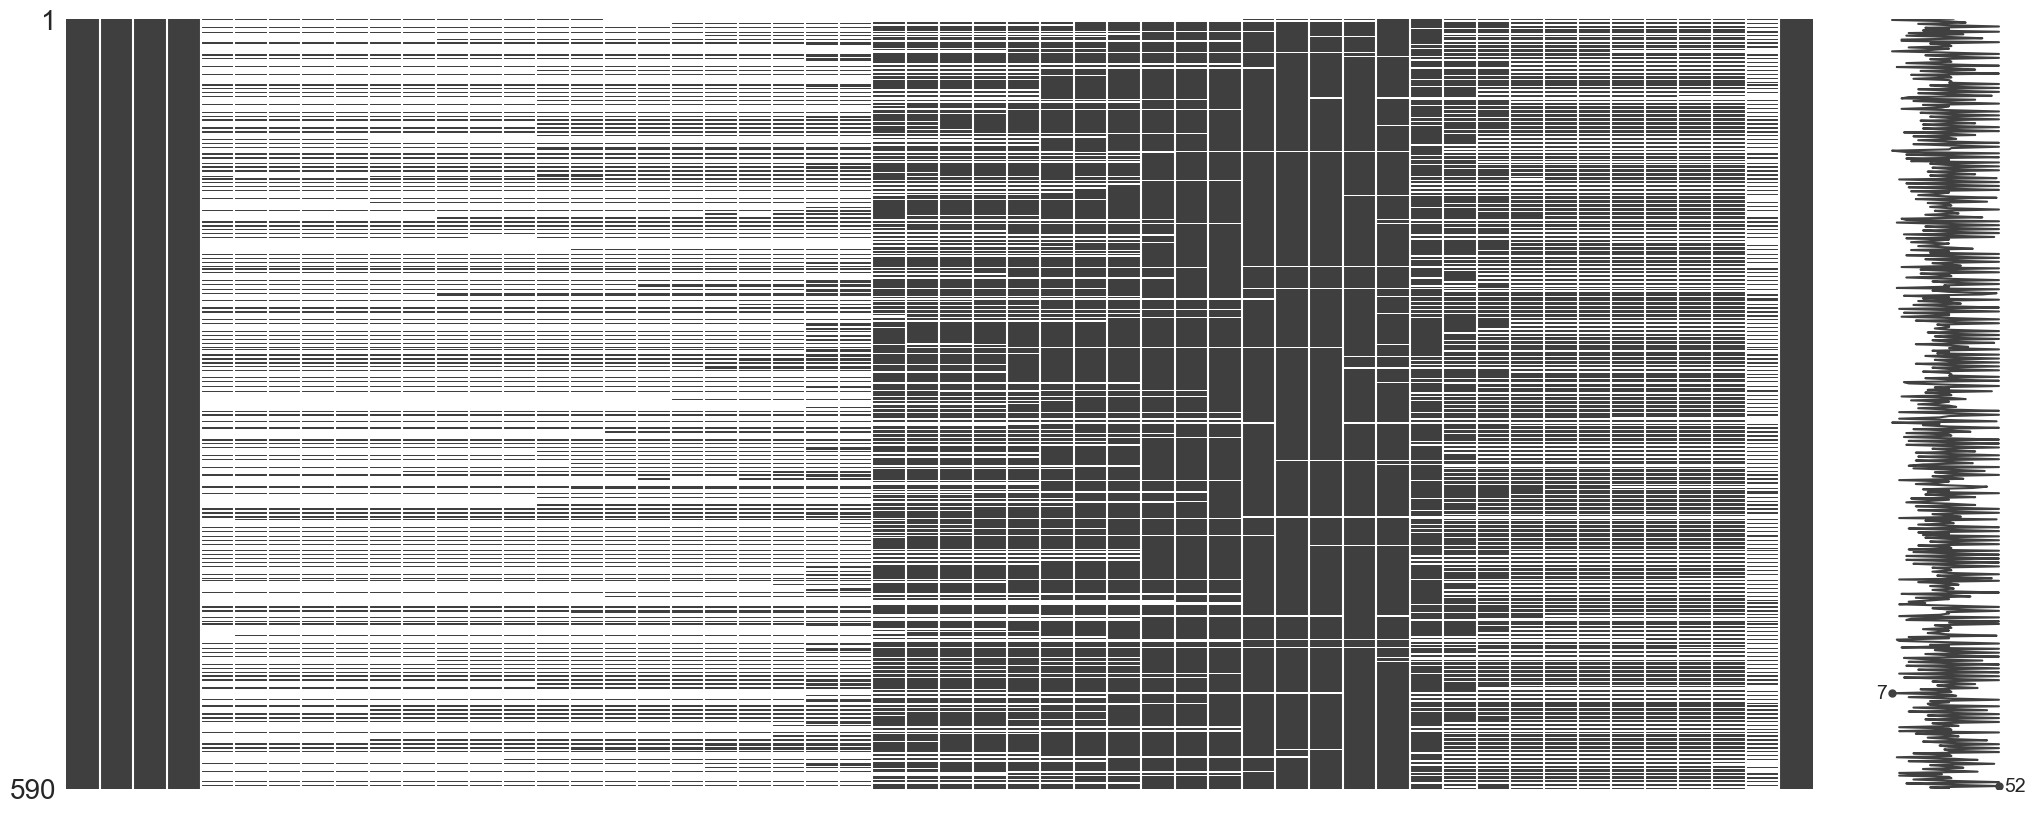

In [49]:
# Using the matrix method to visualise the mv of the DF
msno.matrix(edStatsData_others)

<div style="text-align: justify"> In opposition to the projection indicator, when removing rows that contain only one value allowed to drop all the rows that had missing values which is not the case for these indicators. Some techniques have been developped over the years to handle missing values : </div>

- the first method is replacing missing values with a constant value (generally 0) or a random generated value. It's quick and easy but not efficient at all if the data are not random (such as our case study).
- the imputation by mean, median, mode or any other summary statistic is more accurate and tend to replace missing values with less or no bias on the whole dataset. Despite the fact that our data has outliers and the median can be used, replacing our values by the median will be not efficient and correct for the outcomes of our future analysis.
- another method is to simply drop all rows/columns that have missing values. For our case, it won't be benefit and will lead to a pretty small dataset (regarding the matrix of data above) and doing analysis on a small subset of a dataset can be irrelevant.
- The other method and the one that is used here is using built-in functions in pandas library. The type Dataframe of Pandas has the strenght to have a lot of useful built-in functions to work on the missing values (<em>replace, fillna, interpolate</em>,...) and for our project, the function <em>interpolate</em> will be used to fill the missing values on our dataset. The function takes the argument <em>limit_direction</em> that is optional but if set can determine which direction the missing values are filled. Here, <em>limit_direction</em> is set to 'both'.
- A last method can be quoted is the handling of missing values with a Machine Learning modele. In fact, some packages like XGBoost or sklearn have functions that allow to generate a modele to fill the missing values.

In [50]:
# Calling interpolate function
edStatsData_others.loc[:,'1970':'2016'] = edStatsData_others.loc[:,'1970':'2016'].interpolate(limit_direction='both',
                                                                                              axis=1)
edStatsData_others.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Missing values per row
0,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,1.571874e+02,1.603728e+02,1.361170e+02,1.441103e+02,1.749420e+02,1.879756e+02,...,3.733611e+02,4.458933e+02,5.533003e+02,6.035370e+02,6.690091e+02,6.317450e+02,6.120697e+02,5.695779e+02,5.617787e+02,0.404255
1,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,3.419030e-01,3.419030e-01,3.419030e-01,3.419030e-01,3.419030e-01,3.419030e-01,...,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,0.957447
2,Afghanistan,AFG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2.423555e+06,2.423555e+06,2.423555e+06,2.423555e+06,2.423555e+06,2.423555e+06,...,5.606736e+06,5.848604e+06,6.090239e+06,6.330684e+06,6.569239e+06,6.803785e+06,7.032072e+06,7.252785e+06,7.252785e+06,0.446809
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,6.625201e+02,6.625201e+02,6.625201e+02,6.625201e+02,6.625201e+02,6.625201e+02,...,4.370540e+03,4.114137e+03,4.094359e+03,4.437178e+03,4.247614e+03,4.413082e+03,4.578667e+03,3.934895e+03,4.124982e+03,0.297872
4,Albania,ALB,Personal computers (per 100 people),IT.CMP.PCMP.P2,1.496539e-01,1.496539e-01,1.496539e-01,1.496539e-01,1.496539e-01,1.496539e-01,...,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,0.723404


In [51]:
# Updating the Missing values per row column
edStatsData_others.loc[:,'Missing values per row'] = edStatsData_others.loc[:,'1970':'2016'].isna().mean(axis=1)
edStatsData_others.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Missing values per row
0,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,1.571874e+02,1.603728e+02,1.361170e+02,1.441103e+02,1.749420e+02,1.879756e+02,...,3.733611e+02,4.458933e+02,5.533003e+02,6.035370e+02,6.690091e+02,6.317450e+02,6.120697e+02,5.695779e+02,5.617787e+02,0.0
1,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,3.419030e-01,3.419030e-01,3.419030e-01,3.419030e-01,3.419030e-01,3.419030e-01,...,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,0.0
2,Afghanistan,AFG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2.423555e+06,2.423555e+06,2.423555e+06,2.423555e+06,2.423555e+06,2.423555e+06,...,5.606736e+06,5.848604e+06,6.090239e+06,6.330684e+06,6.569239e+06,6.803785e+06,7.032072e+06,7.252785e+06,7.252785e+06,0.0
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,6.625201e+02,6.625201e+02,6.625201e+02,6.625201e+02,6.625201e+02,6.625201e+02,...,4.370540e+03,4.114137e+03,4.094359e+03,4.437178e+03,4.247614e+03,4.413082e+03,4.578667e+03,3.934895e+03,4.124982e+03,0.0
4,Albania,ALB,Personal computers (per 100 people),IT.CMP.PCMP.P2,1.496539e-01,1.496539e-01,1.496539e-01,1.496539e-01,1.496539e-01,1.496539e-01,...,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,0.0


number of missing values : 0


<AxesSubplot:>

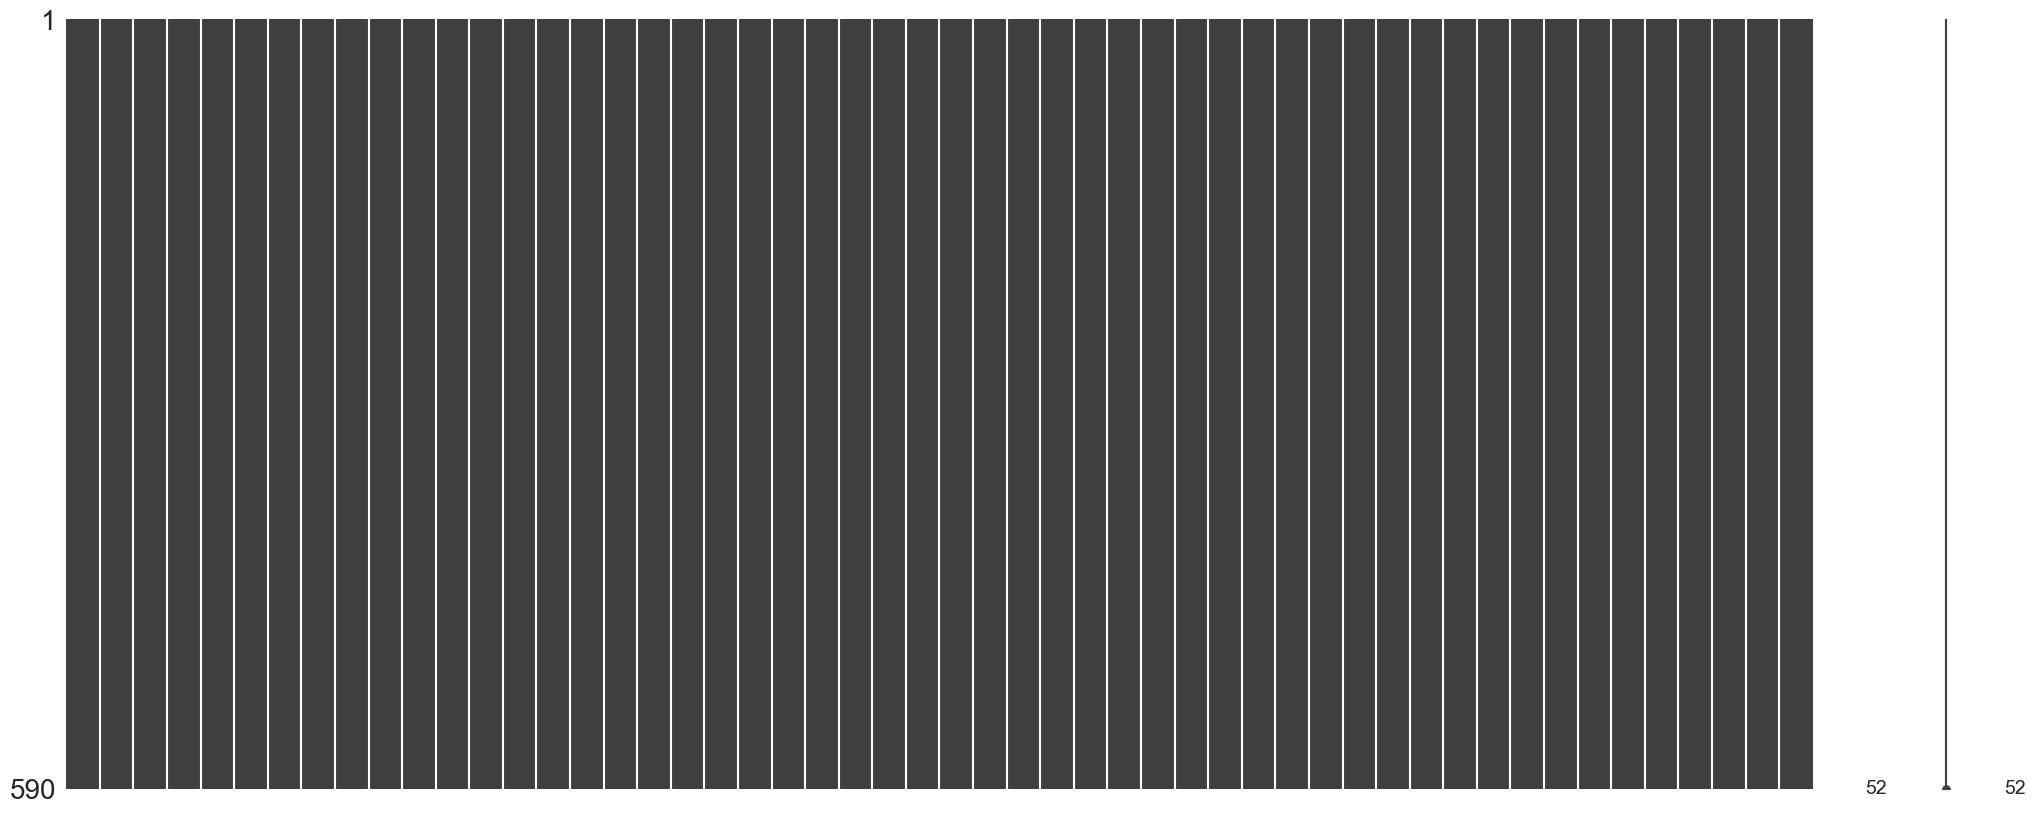

In [52]:
# Using the matrix method to visualise the mv of the DF
print("number of missing values : " + str(edStatsData_others.isna().sum().sum()))
msno.matrix(edStatsData_others)

In [53]:
# Checking for duplicates
print('duplicated rows : ' + str(edStatsData_others.duplicated(subset=['Country Name', 'Indicator Name']).sum()))

duplicated rows : 0


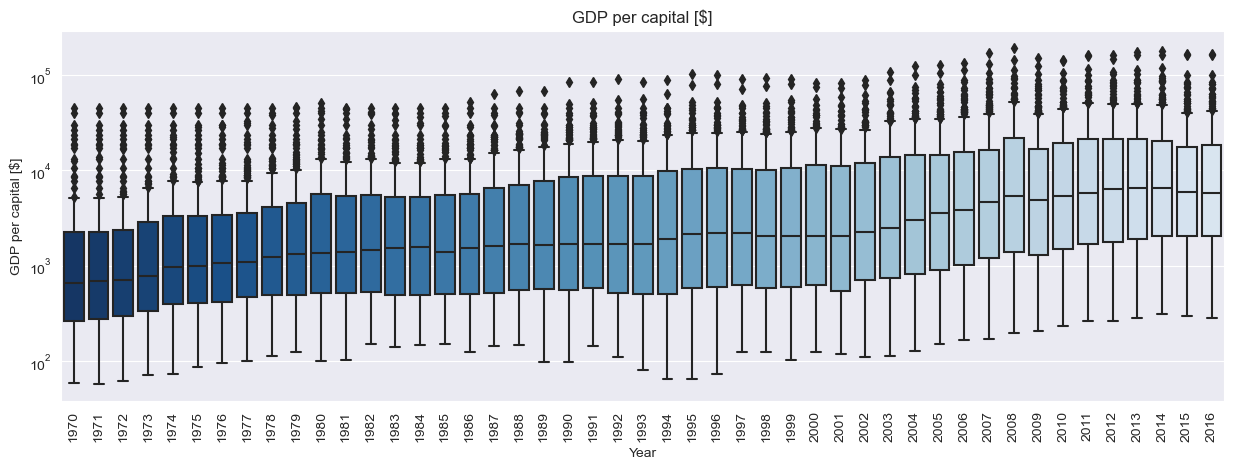

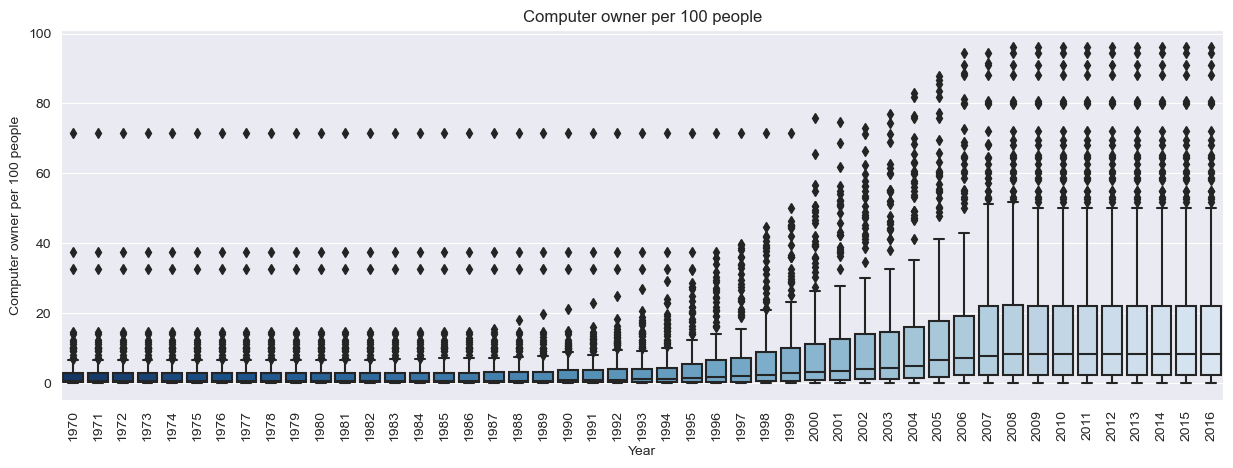

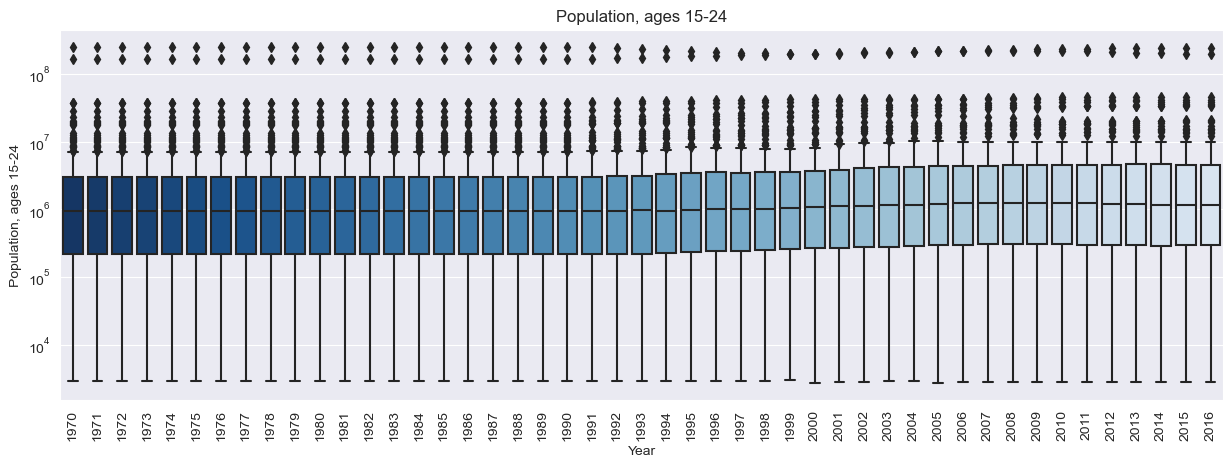

In [54]:
# GDP indicator
edStatsData_others_GDP_bp = edStatsData_others.loc[edStatsData_others['Indicator Code'] == 'NY.GDP.PCAP.CD',
                                               '1970':'2016']
plt_bp(edStatsData_others_GDP_bp, 'GDP per capital [$]')

# computer owner indicator
edStatsData_others_comp_bp = edStatsData_others.loc[edStatsData_others['Indicator Code'] == 'IT.CMP.PCMP.P2',
                                               '1970':'2016']
plt_bp(edStatsData_others_comp_bp, 'Computer owner per 100 people', log=False)

# population ages1524 indicator
edStatsData_others_pop1524_bp = edStatsData_others.loc[edStatsData_others['Indicator Code'] == 'SP.POP.1524.TO.UN',
                                               '1970':'2016']
plt_bp(edStatsData_others_pop1524_bp, 'Population, ages 15-24')

<div style="text-align: justify"> Using this method replaces all the missing values as shown in the matrix above. </div> </br>

<div style="text-align: justify"> Calling once again the function that displays boxplots allows us to have a better visualization of the values. Making sure that replacing missing values didn't add outliers to the dataset. These plots show that the interpolate didn't affect the general shape of the different indicators. </div>


## Data manipulation of the standard indicators

<div style="text-align: justify"> The data manipulation of the standard indicators is similar to the projection indicator. The subset of <em>EdStatsData</em> dataset and <em>EdStatsCountry</em> have to be merged together with the same way as before. </div>

In [55]:
# Merging EdStatsCountry and EdStatsData_others together with right join
edStatsData_oth_merged = pd.merge(edStatsCountry[['Country Code', 'Region']], edStatsData_others,
                                  on='Country Code', how='right')
display(edStatsData_oth_merged.head())
edStatsData_oth_merged['Indicator Name'].unique()

,Country Code,Region,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Missing values per row
0,AFG,South Asia,Afghanistan,GDP per capita (current US$),NY.GDP.PCAP.CD,1.571874e+02,1.603728e+02,1.361170e+02,1.441103e+02,1.749420e+02,...,3.733611e+02,4.458933e+02,5.533003e+02,6.035370e+02,6.690091e+02,6.317450e+02,6.120697e+02,5.695779e+02,5.617787e+02,0.0
1,AFG,South Asia,Afghanistan,Personal computers (per 100 people),IT.CMP.PCMP.P2,3.419030e-01,3.419030e-01,3.419030e-01,3.419030e-01,3.419030e-01,...,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,0.0
2,AFG,South Asia,Afghanistan,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2.423555e+06,2.423555e+06,2.423555e+06,2.423555e+06,2.423555e+06,...,5.606736e+06,5.848604e+06,6.090239e+06,6.330684e+06,6.569239e+06,6.803785e+06,7.032072e+06,7.252785e+06,7.252785e+06,0.0
3,ALB,Europe & Central Asia,Albania,GDP per capita (current US$),NY.GDP.PCAP.CD,6.625201e+02,6.625201e+02,6.625201e+02,6.625201e+02,6.625201e+02,...,4.370540e+03,4.114137e+03,4.094359e+03,4.437178e+03,4.247614e+03,4.413082e+03,4.578667e+03,3.934895e+03,4.124982e+03,0.0
4,ALB,Europe & Central Asia,Albania,Personal computers (per 100 people),IT.CMP.PCMP.P2,1.496539e-01,1.496539e-01,1.496539e-01,1.496539e-01,1.496539e-01,...,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,0.0


array(['GDP per capita (current US$)',
       'Personal computers (per 100 people)',
       'Population, ages 15-24, total'], dtype=object)

In [56]:
# Dropping the missing values per row column
edStatsData_oth_merged.drop('Missing values per row', axis=1, inplace=True)

In [57]:
# Checking on the mv for the new merged DF
edStatsData_oth_merged.isna().sum()

Country Code      0
Region            1
Country Name      0
Indicator Name    0
Indicator Code    0
1970              0
1971              0
1972              0
1973              0
1974              0
1975              0
1976              0
1977              0
1978              0
1979              0
1980              0
1981              0
1982              0
1983              0
1984              0
1985              0
1986              0
1987              0
1988              0
1989              0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0


<div style="text-align: justify"> The checking of the missing values shows that there is one missing value on the Region column. Let's display the specific line below. </div>

In [58]:
# Finding which row has the NaN value in its Region column
edStatsData_oth_merged[edStatsData_oth_merged['Region'].isna()]

,Country Code,Region,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
206,GIB,NaN,Gibraltar,Personal computers (per 100 people),IT.CMP.PCMP.P2,11.750018,11.750018,11.750018,11.750018,11.750018,...,54.842602,54.842602,54.842602,54.842602,54.842602,54.842602,54.842602,54.842602,54.842602,54.842602


In [59]:
edStatsData_oth_merged['Region'].unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America',
       nan], dtype=object)

<div style="text-align: justify"> Gibraltar has no Region setted. Using iloc function to replace the missing value by its correct value. </div>

In [60]:
# Setting the right Region to the NaN value of Gibraltar row
edStatsData_oth_merged.iloc[206, 1] = 'Europe & Central Asia'

In [61]:
edStatsData_oth_merged.isna().sum()

Country Code      0
Region            0
Country Name      0
Indicator Name    0
Indicator Code    0
1970              0
1971              0
1972              0
1973              0
1974              0
1975              0
1976              0
1977              0
1978              0
1979              0
1980              0
1981              0
1982              0
1983              0
1984              0
1985              0
1986              0
1987              0
1988              0
1989              0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0


In [62]:
edStatsData_oth_merged.head()

,Country Code,Region,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,AFG,South Asia,Afghanistan,GDP per capita (current US$),NY.GDP.PCAP.CD,1.571874e+02,1.603728e+02,1.361170e+02,1.441103e+02,1.749420e+02,...,3.698358e+02,3.733611e+02,4.458933e+02,5.533003e+02,6.035370e+02,6.690091e+02,6.317450e+02,6.120697e+02,5.695779e+02,5.617787e+02
1,AFG,South Asia,Afghanistan,Personal computers (per 100 people),IT.CMP.PCMP.P2,3.419030e-01,3.419030e-01,3.419030e-01,3.419030e-01,3.419030e-01,...,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01,3.901483e-01
2,AFG,South Asia,Afghanistan,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2.423555e+06,2.423555e+06,2.423555e+06,2.423555e+06,2.423555e+06,...,5.367499e+06,5.606736e+06,5.848604e+06,6.090239e+06,6.330684e+06,6.569239e+06,6.803785e+06,7.032072e+06,7.252785e+06,7.252785e+06
3,ALB,Europe & Central Asia,Albania,GDP per capita (current US$),NY.GDP.PCAP.CD,6.625201e+02,6.625201e+02,6.625201e+02,6.625201e+02,6.625201e+02,...,3.603014e+03,4.370540e+03,4.114137e+03,4.094359e+03,4.437178e+03,4.247614e+03,4.413082e+03,4.578667e+03,3.934895e+03,4.124982e+03
4,ALB,Europe & Central Asia,Albania,Personal computers (per 100 people),IT.CMP.PCMP.P2,1.496539e-01,1.496539e-01,1.496539e-01,1.496539e-01,1.496539e-01,...,4.105840e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00,4.593538e+00


## Analysis of the standard indicators

<a id='group_stat_t_plot'></a>
<div style="text-align: justify"> Cleaning and manipulation processes have been performed and done. The analysis of the standard indicators can now start. </div> </br>

<div style="text-align: justify"> A function is created to group by region, to compute the statistics needed, to transpose the grouped dataset then to plot the resulting DataFrame at once for each indicator to ease our work. It returns 3 DF, one for each of the statistic calculated. </div>

In [63]:
def group_stat_t_plot(df, ind):
    """group_stat_t_plot returns 3 DataFrame grouped by region, calculate statistics (mean, median, std),
    transposing the grouped DF in order to plot the resulting DF
    
    Parameters:
    df (DataFrame): a DataFrame
    
    Returns:
    DataFrame 1: Returns a DataFrame of means grouped by region and transposed
    DataFrame 2: Returns a DataFrame of medians grouped by region and transposed
    DataFrame 3: Returns a DataFrame of stds grouped by region and transposed
    
    """
    try:
        if isinstance(df, pd.DataFrame):
            # call clc_stat to calculate the mean
            df_mean = clc_stat(df, pd.core.groupby.SeriesGroupBy.mean)
            df_mean_t = df_mean.transpose()
            display(df_mean_t.head())
            
            # call disp_graph_ind to plot the resulting DF
            disp_graph_ind(df_mean_t, 'Mean', ind)
            
            # call clc_stat to calculate the median
            df_median = clc_stat(df, pd.core.groupby.SeriesGroupBy.median)
            df_median_t = df_median.transpose()
            display(df_median_t.head())
            
            # call disp_graph_ind to plot the resulting DF
            disp_graph_ind(df_median_t, 'Median', ind)
            
            # call clc_stat to calculate the std
            df_std = clc_stat(df, pd.core.groupby.SeriesGroupBy.std)
            df_std_t = df_std.transpose()
            display(df_std_t.head())
            
            # call disp_graph_ind to plot the resulting DF
            disp_graph_ind(df_std_t, 'Std', ind)
    except TypeError:
        print("TypeError: Check your input arguments.")
        
    return df_mean_t, df_median_t, df_std_t


### <font color='grey'>Analysis of the GDP indicator</font>

<div style="text-align: justify"> Analysis the different indicators separely will be easier to handle the data. The analysis will be organized as follow : the first step is retrieving the indicator, then calling the function that computes the mean, median and standard deviation, that groups by region and transposes it in order to plot the summary statistics. </div>
<div style="text-align: justify"> These calculations will highlight which regions are most likely to be interesting for our case. Right after grouping by region, a computation of the mean, median and standard deviation per country is performed to be more focus on countries of the specific regions. </div>

In [64]:
# Retrieving the GDP indicator
indicator = ['NY.GDP.PCAP.CD']
edStatsData_oth_gdp_merged = retrieve_indicator(edStatsData_oth_merged, indicator)

,Country Code,Region,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,AFG,South Asia,Afghanistan,GDP per capita (current US$),NY.GDP.PCAP.CD,157.187422,160.372836,136.117014,144.110319,174.942038,...,369.835796,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,569.577923,561.778746
3,ALB,Europe & Central Asia,Albania,GDP per capita (current US$),NY.GDP.PCAP.CD,662.520052,662.520052,662.520052,662.520052,662.520052,...,3603.013685,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4413.081697,4578.666728,3934.895394,4124.982390
6,DZA,Middle East & North Africa,Algeria,GDP per capita (current US$),NY.GDP.PCAP.CD,334.259528,339.384049,439.731124,551.434442,813.049903,...,3935.183343,4905.254866,3868.831230,4463.394675,5432.413320,5565.134521,5471.123389,5466.425778,4160.220067,3916.881571
9,ASM,East Asia & Pacific,American Samoa,GDP per capita (current US$),NY.GDP.PCAP.CD,8751.766529,8751.766529,8751.766529,8751.766529,8751.766529,...,8980.536414,9871.997194,12058.263823,10352.822762,10375.994215,11660.329531,11589.853002,11598.751736,11865.963232,11834.745229
10,AND,Europe & Central Asia,Andorra,GDP per capita (current US$),NY.GDP.PCAP.CD,3238.556850,3498.173652,4217.173581,5342.168560,6319.739034,...,48582.808455,47785.659086,43339.379875,39736.354063,41098.766942,38391.080867,40619.711298,42294.994727,36038.267604,36988.622030


NY.GDP.PCAP.CD : (209, 52)


<div style="text-align: justify"> Calling the <em>group_stat_t_plot</em> function that proceed to all the computation and plot the graph of all the summary statistics. </div>

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,2460.917552,2504.035468,2605.868420,2803.425779,3108.502069,3187.266416,3287.132992,3436.313558,3667.656642,4000.556424,...,11612.517791,12456.253077,11743.628626,13422.811359,15294.389921,16141.021000,16514.114267,16601.724224,15343.992145,15374.736216
Europe & Central Asia,4721.763038,4858.378108,5118.494716,5561.351893,5850.040674,6221.320477,6382.142707,6734.191175,7403.379270,8128.562916,...,32716.821228,35538.538918,31242.292856,31481.349005,34341.917730,32815.313374,34426.278381,35155.154526,31395.468443,31578.347290
Latin America & Caribbean,2208.734304,2257.663132,2309.302237,2429.769365,2567.932186,2580.858027,2638.561101,2772.122230,2902.958524,3156.725837,...,10379.748236,10974.280743,10499.131651,11151.403295,11683.783942,12125.235559,12277.433024,12432.817484,12321.892995,12240.898510
Middle East & North Africa,2805.110125,2896.529989,3019.849744,3249.802452,4514.287657,4466.915746,4967.782607,5311.351148,5198.808605,6406.375790,...,14218.504631,16969.922918,13518.246445,14838.623253,16818.057986,17331.803167,17465.617751,17294.324337,14504.420305,13990.017098
North America,4252.029751,4692.000064,5198.238675,5873.742203,6713.282680,7273.146655,8218.800542,8911.618123,9520.070050,10440.460429,...,61151.883814,62867.837166,58746.107510,61342.894133,62615.344885,63135.090891,63649.604506,63595.683286,61844.258275,61848.050831


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1970,2460.917552,4721.763038,2208.734304,2805.110125,4252.029751,179.328453,328.072634
1971,2504.035468,4858.378108,2257.663132,2896.529989,4692.000064,180.694647,336.850367
1972,2605.868420,5118.494716,2309.302237,3019.849744,5198.238675,172.843407,353.971399
1973,2803.425779,5561.351893,2429.769365,3249.802452,5873.742203,174.982433,399.033441
1974,3108.502069,5850.040674,2567.932186,4514.287657,6713.282680,201.638922,461.384178


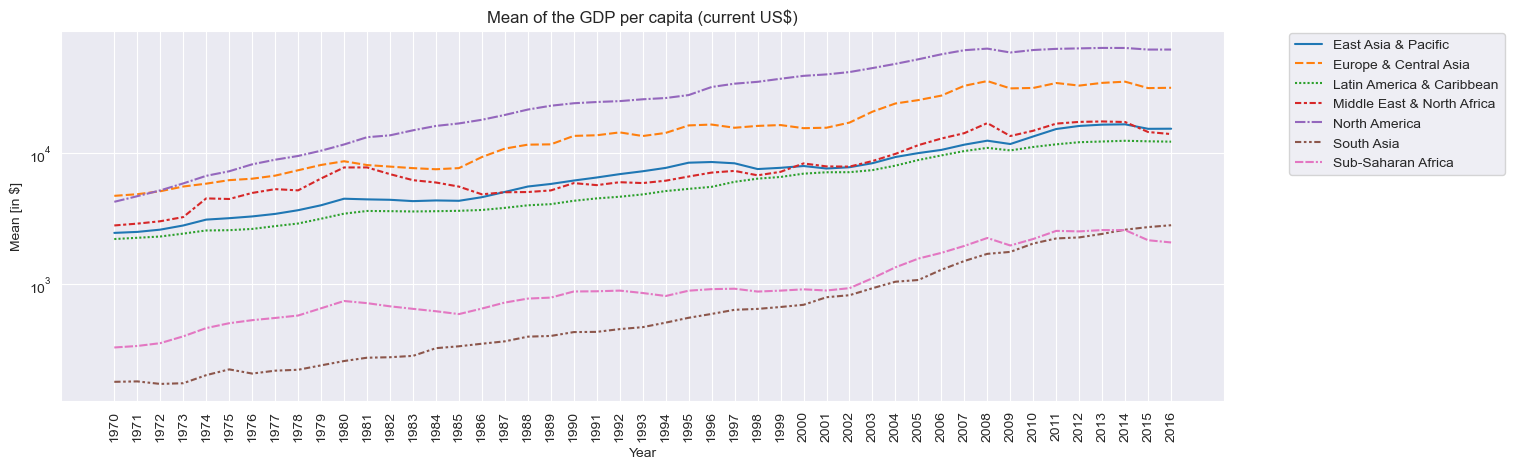

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,925.287389,972.627222,972.627222,972.627222,987.976170,998.419710,980.167471,1050.898003,1246.535891,1320.062471,...,3022.561555,3509.761499,3369.408247,3651.966784,4353.121392,4546.738504,4763.068956,5045.769926,4921.950723,5233.469423
Europe & Central Asia,2238.802958,2298.004539,2329.270854,2502.814358,2828.748432,3153.235306,3270.405729,3428.762018,3428.762018,3428.762018,...,18373.648998,22698.853957,19741.597628,19808.071091,21717.457939,19729.870511,19916.019387,19949.581377,17715.616852,17930.164229
Latin America & Caribbean,653.232915,726.337344,774.169300,774.169300,970.735429,1063.420113,1063.420113,1271.655281,1255.874267,1483.515980,...,6068.086607,6911.136136,7384.859301,7937.259931,8270.541758,8218.053212,8481.890521,8796.691080,8757.206202,8208.555984
Middle East & North Africa,801.172727,801.172727,801.172727,876.309241,1241.684289,1241.684289,1471.211339,1592.028539,1847.896567,2426.454373,...,4857.368371,5574.410436,5619.117621,6531.927430,5854.614497,6651.122420,6036.192088,5602.549434,4974.026930,5219.109408
North America,4121.932809,4586.255848,5141.616725,5870.600564,7043.474351,7489.940531,8611.401839,8892.761680,9096.058722,10012.443967,...,48061.537661,48401.427340,47001.555350,48373.878816,52082.210760,52496.694870,52787.026949,54598.550689,56469.008969,57638.159088


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1970,925.287389,2238.802958,653.232915,801.172727,4121.932809,164.899081,209.598550
1971,972.627222,2298.004539,726.337344,801.172727,4586.255848,169.000006,209.043093
1972,972.627222,2329.270854,774.169300,801.172727,5141.616725,143.941892,220.920635
1973,972.627222,2502.814358,774.169300,876.309241,5870.600564,143.190200,257.968103
1974,987.976170,2828.748432,970.735429,1241.684289,7043.474351,176.993552,309.657678


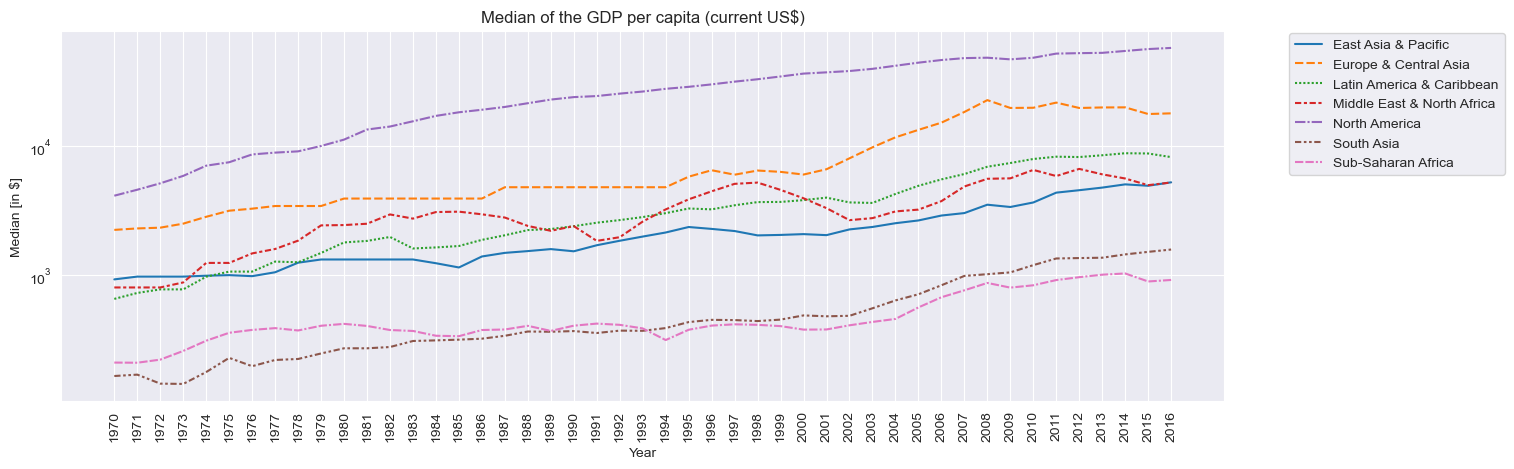

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,4770.558933,4766.766820,4766.891062,4766.455494,4829.446785,4877.601149,4920.861230,4994.845572,5109.373338,5398.916361,...,13682.563050,14869.398827,13885.173342,16410.157373,19423.199429,20772.260165,21779.176123,21851.751262,18992.888523,18538.548752
Europe & Central Asia,8485.599131,8485.327975,8515.562470,8620.493983,8663.188117,8895.216038,8943.278821,9102.560756,9617.156008,10234.371327,...,34958.087000,37862.959123,32435.248697,32967.299064,36334.512878,35102.611541,37146.476770,37918.224663,35504.217931,35510.935124
Latin America & Caribbean,5604.064346,5595.637201,5589.066309,5569.051499,5539.475568,5527.851775,5522.172871,5503.333946,5488.349160,5483.809579,...,12646.609904,12310.551430,12074.052646,12086.381018,12033.176011,12138.094151,11949.544893,11848.519237,11954.232561,11955.551794
Middle East & North Africa,5872.192733,5874.992390,5864.739355,5873.460884,6699.643217,6522.842637,7386.388170,8072.114169,7309.419818,9147.828626,...,17847.857294,21422.483450,15572.029452,17251.471182,21069.861553,21772.062583,21776.843378,21349.631948,16819.061168,15740.887366
North America,936.606731,883.331647,884.736162,866.023616,750.838786,681.680590,833.702769,550.502091,930.711245,1105.105483,...,25779.013196,26635.107812,25923.570913,23269.892416,20260.883117,19339.681600,19138.738730,19296.852323,21720.874248,22097.905139


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1970,4770.558933,8485.599131,5604.064346,5872.192733,936.606731,84.008694,411.558069
1971,4766.766820,8485.327975,5595.637201,5874.992390,883.331647,83.708416,412.810644
1972,4766.891062,8515.562470,5589.066309,5864.739355,884.736162,87.801821,412.289593
1973,4766.455494,8620.493983,5569.051499,5873.460884,866.023616,89.300079,430.378571
1974,4829.446785,8663.188117,5539.475568,6699.643217,750.838786,79.979879,515.504782


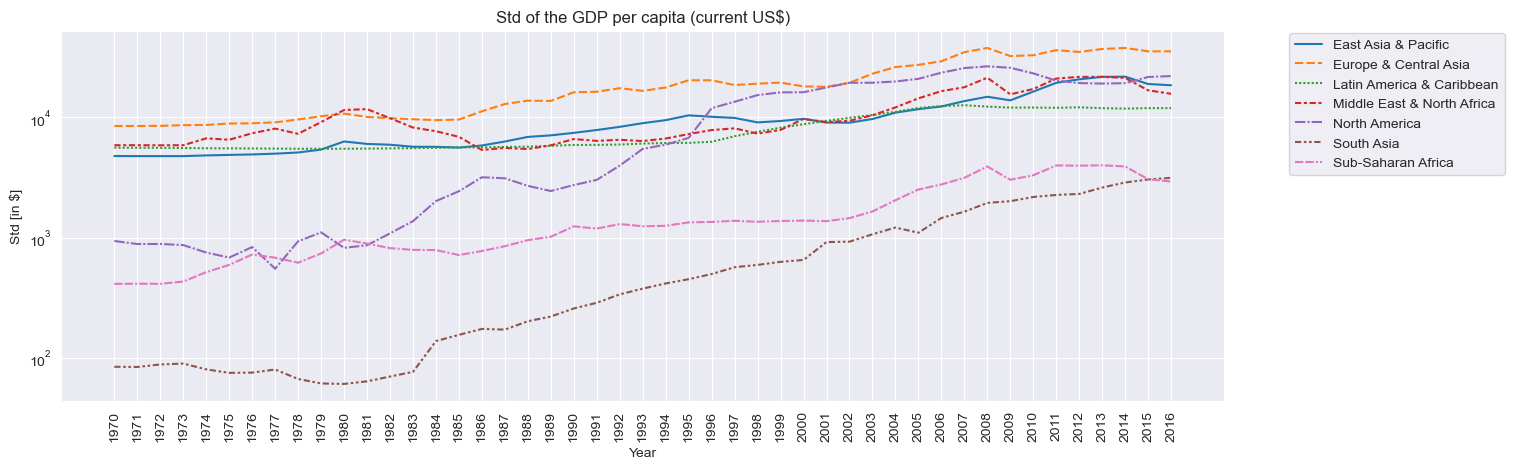

In [65]:
ind = edStatsData_oth_gdp_merged['Indicator Code'].iloc[0]
group_stat_t_plot(edStatsData_oth_gdp_merged, ind);

<div style="text-align: justify"> According to the mean plot, the Europe &amp; Central Asia, the East Asia &amp; Pacific and the North America regions tend to have a higher GDP per capita over the years which gives us a good hint for picking countries later on. </div>

<div style="text-align: justify"> Instead of grouping by region, the computation of the mean, median and standard deviation per country is performed here to retrieve countries that are interesting to study. </div>

In [66]:
edStatsData_oth_gdp_merged = add_mean_med_std_cols(edStatsData_oth_gdp_merged)
edStatsData_oth_gdp_merged.head()

,Country Code,Region,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2010,2011,2012,2013,2014,2015,2016,Mean per country,Median per country,Std per country
0,AFG,South Asia,Afghanistan,GDP per capita (current US$),NY.GDP.PCAP.CD,157.187422,160.372836,136.117014,144.110319,174.942038,...,553.300289,603.537023,669.009051,631.744971,612.069651,569.577923,561.778746,271.009883,220.454695,149.475298
3,ALB,Europe & Central Asia,Albania,GDP per capita (current US$),NY.GDP.PCAP.CD,662.520052,662.520052,662.520052,662.520052,662.520052,...,4094.358832,4437.178068,4247.614308,4413.081697,4578.666728,3934.895394,4124.982390,1617.915289,721.283453,1425.342825
6,DZA,Middle East & North Africa,Algeria,GDP per capita (current US$),NY.GDP.PCAP.CD,334.259528,339.384049,439.731124,551.434442,813.049903,...,4463.394675,5432.413320,5565.134521,5471.123389,5466.425778,4160.220067,3916.881571,2417.451774,2193.443590,1375.037614
9,ASM,East Asia & Pacific,American Samoa,GDP per capita (current US$),NY.GDP.PCAP.CD,8751.766529,8751.766529,8751.766529,8751.766529,8751.766529,...,10352.822762,10375.994215,11660.329531,11589.853002,11598.751736,11865.963232,11834.745229,9223.760464,8751.766529,1022.176374
10,AND,Europe & Central Asia,Andorra,GDP per capita (current US$),NY.GDP.PCAP.CD,3238.556850,3498.173652,4217.173581,5342.168560,6319.739034,...,39736.354063,41098.766942,38391.080867,40619.711298,42294.994727,36038.267604,36988.622030,21271.588435,18669.785414,13604.939842


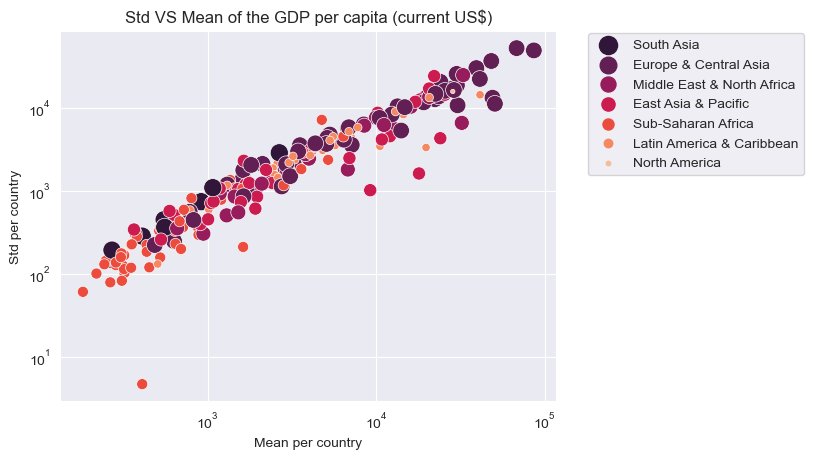

In [67]:
disp_sp_ind(edStatsData_oth_gdp_merged, 'NY.GDP.PCAP.CD')


In [68]:
edStatsData_oth_gdp_merged.sort_values(by=['Mean per country', 'Std per country'], ascending=[False, False]).head(15)

,Country Code,Region,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2010,2011,2012,2013,2014,2015,2016,Mean per country,Median per country,Std per country
358,MCO,Europe & Central Asia,Monaco,GDP per capita (current US$),NY.GDP.PCAP.CD,12479.725261,13813.300504,16733.621606,21422.841160,22707.456038,...,144246.368775,162009.877819,162009.877819,162009.877819,162009.877819,162009.877819,162009.877819,86289.847916,84854.211092,49269.493751
308,LIE,Europe & Central Asia,Liechtenstein,GDP per capita (current US$),NY.GDP.PCAP.CD,4236.930668,4827.792883,5640.464314,7354.102368,8441.047842,...,141165.082857,158283.076260,149295.646044,173528.150454,179308.075616,168146.015281,168146.015281,68170.496260,60038.918961,52484.941545
445,SMR,Europe & Central Asia,San Marino,GDP per capita (current US$),NY.GDP.PCAP.CD,44862.894513,44862.894513,44862.894513,44862.894513,44862.894513,...,68758.368617,65213.618990,56403.994833,57746.166070,56513.516081,47610.985076,47908.561413,50682.483868,44862.894513,11231.811492
109,CHI,Europe & Central Asia,Channel Islands,GDP per capita (current US$),NY.GDP.PCAP.CD,40537.511687,40537.511687,40537.511687,40537.511687,40537.511687,...,73569.644965,73569.644965,73569.644965,73569.644965,73569.644965,73569.644965,73569.644965,49070.246848,40537.511687,13270.592134
313,LUX,Europe & Central Asia,Luxembourg,GDP per capita (current US$),NY.GDP.PCAP.CD,4449.540387,4591.747503,5680.129895,7709.729387,9282.808109,...,104965.306078,115761.507705,106749.013623,113625.132900,119225.380023,101446.786303,100573.139978,48239.257362,43480.489703,36738.632639
59,BMU,North America,Bermuda,GDP per capita (current US$),NY.GDP.PCAP.CD,3387.272727,3866.300366,4343.173432,5009.293680,5853.932584,...,88207.327560,85973.158416,85458.455508,85748.065414,85748.065414,85748.065414,85748.065414,42005.207343,31188.379003,30618.597405
101,CYM,Latin America & Caribbean,Cayman Islands,GDP per capita (current US$),NY.GDP.PCAP.CD,30189.768430,30189.768430,30189.768430,30189.768430,30189.768430,...,64100.907696,64100.907696,64100.907696,64100.907696,64100.907696,64100.907696,64100.907696,41373.229252,30189.768430,14407.521608
509,CHE,Europe & Central Asia,Switzerland,GDP per capita (current US$),NY.GDP.PCAP.CD,18832.196719,18832.196719,18832.196719,18832.196719,18832.196719,...,74605.721021,88415.628061,83538.230078,85112.464398,86605.563376,82016.021313,79890.524005,41271.900064,38483.687778,22342.299896
396,NOR,Europe & Central Asia,Norway,GDP per capita (current US$),NY.GDP.PCAP.CD,3306.219476,3736.348737,4413.575692,5689.588807,6811.527337,...,87770.266844,100711.224781,101668.170659,103059.248228,97199.919096,74521.569932,70911.757159,39339.750223,29919.913481,30181.849731
430,QAT,Middle East & North Africa,Qatar,GDP per capita (current US$),NY.GDP.PCAP.CD,2755.732617,3246.416836,3909.019418,5581.262562,15623.557145,...,70306.227845,85948.070456,88564.822980,88304.879575,86852.710189,66346.522669,59324.338773,32831.263893,21113.411419,24854.101952


<div style="text-align: justify"> One last step to filter by regions can be performed to retrieve only countries from a specific region. </div>

In [69]:
cond = (edStatsData_oth_gdp_merged['Region'] == 'North America') | (edStatsData_oth_gdp_merged['Region'] == 'Europe & Central Asia')
edStatsData_oth_gdp_merged.loc[cond, :].sort_values(by=['Mean per country', 'Std per country'], ascending=[False, False]).head(30)


,Country Code,Region,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2010,2011,2012,2013,2014,2015,2016,Mean per country,Median per country,Std per country
358,MCO,Europe & Central Asia,Monaco,GDP per capita (current US$),NY.GDP.PCAP.CD,12479.725261,13813.300504,16733.621606,21422.841160,22707.456038,...,144246.368775,162009.877819,162009.877819,162009.877819,162009.877819,162009.877819,162009.877819,86289.847916,84854.211092,49269.493751
308,LIE,Europe & Central Asia,Liechtenstein,GDP per capita (current US$),NY.GDP.PCAP.CD,4236.930668,4827.792883,5640.464314,7354.102368,8441.047842,...,141165.082857,158283.076260,149295.646044,173528.150454,179308.075616,168146.015281,168146.015281,68170.496260,60038.918961,52484.941545
445,SMR,Europe & Central Asia,San Marino,GDP per capita (current US$),NY.GDP.PCAP.CD,44862.894513,44862.894513,44862.894513,44862.894513,44862.894513,...,68758.368617,65213.618990,56403.994833,57746.166070,56513.516081,47610.985076,47908.561413,50682.483868,44862.894513,11231.811492
109,CHI,Europe & Central Asia,Channel Islands,GDP per capita (current US$),NY.GDP.PCAP.CD,40537.511687,40537.511687,40537.511687,40537.511687,40537.511687,...,73569.644965,73569.644965,73569.644965,73569.644965,73569.644965,73569.644965,73569.644965,49070.246848,40537.511687,13270.592134
313,LUX,Europe & Central Asia,Luxembourg,GDP per capita (current US$),NY.GDP.PCAP.CD,4449.540387,4591.747503,5680.129895,7709.729387,9282.808109,...,104965.306078,115761.507705,106749.013623,113625.132900,119225.380023,101446.786303,100573.139978,48239.257362,43480.489703,36738.632639
59,BMU,North America,Bermuda,GDP per capita (current US$),NY.GDP.PCAP.CD,3387.272727,3866.300366,4343.173432,5009.293680,5853.932584,...,88207.327560,85973.158416,85458.455508,85748.065414,85748.065414,85748.065414,85748.065414,42005.207343,31188.379003,30618.597405
509,CHE,Europe & Central Asia,Switzerland,GDP per capita (current US$),NY.GDP.PCAP.CD,18832.196719,18832.196719,18832.196719,18832.196719,18832.196719,...,74605.721021,88415.628061,83538.230078,85112.464398,86605.563376,82016.021313,79890.524005,41271.900064,38483.687778,22342.299896
396,NOR,Europe & Central Asia,Norway,GDP per capita (current US$),NY.GDP.PCAP.CD,3306.219476,3736.348737,4413.575692,5689.588807,6811.527337,...,87770.266844,100711.224781,101668.170659,103059.248228,97199.919096,74521.569932,70911.757159,39339.750223,29919.913481,30181.849731
179,FRO,Europe & Central Asia,Faroe Islands,GDP per capita (current US$),NY.GDP.PCAP.CD,23737.416766,23737.416766,23737.416766,23737.416766,23737.416766,...,47397.902923,50789.048604,48421.803072,53612.825004,57543.669059,50581.968492,50581.968492,30435.934943,23737.416766,10762.611362
146,DNK,Europe & Central Asia,Denmark,GDP per capita (current US$),NY.GDP.PCAP.CD,3464.456995,3845.496159,4654.305336,6119.372658,6770.733930,...,58041.411225,61753.660072,58507.500210,61191.192626,62548.985017,53012.996584,53549.700671,30153.804135,29782.609873,18728.801406


### <font color='grey'>Analysis of the Personal computer owners indicator</font>

<div style="text-align: justify"> Following the same process as the previous indicator, the analysis of the personal computer owners indicator is made. </div>

In [70]:
# Retrieving the IT indicator
indicator = ['IT.CMP.PCMP.P2']
edStatsData_oth_it_merged = retrieve_indicator(edStatsData_oth_merged, indicator)

,Country Code,Region,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,AFG,South Asia,Afghanistan,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.341903,0.341903,0.341903,0.341903,0.341903,...,0.390148,0.390148,0.390148,0.390148,0.390148,0.390148,0.390148,0.390148,0.390148,0.390148
4,ALB,Europe & Central Asia,Albania,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.149654,0.149654,0.149654,0.149654,0.149654,...,4.105840,4.593538,4.593538,4.593538,4.593538,4.593538,4.593538,4.593538,4.593538,4.593538
7,DZA,Middle East & North Africa,Algeria,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.095275,0.095275,0.095275,0.095275,0.095275,...,1.030597,1.030597,1.030597,1.030597,1.030597,1.030597,1.030597,1.030597,1.030597,1.030597
13,AGO,Sub-Saharan Africa,Angola,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.062542,0.062542,0.062542,0.062542,0.062542,...,0.646019,0.646019,0.646019,0.646019,0.646019,0.646019,0.646019,0.646019,0.646019,0.646019
16,ATG,Latin America & Caribbean,Antigua and Barbuda,Personal computers (per 100 people),IT.CMP.PCMP.P2,10.130173,10.130173,10.130173,10.130173,10.130173,...,20.966370,20.966370,20.966370,20.966370,20.966370,20.966370,20.966370,20.966370,20.966370,20.966370


IT.CMP.PCMP.P2 : (189, 52)


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,2.463249,2.463249,2.463249,2.463249,2.463249,2.463249,2.463249,2.463249,2.463249,2.463249,...,18.656551,18.828968,18.879208,18.879208,18.879208,18.879208,18.879208,18.879208,18.879208,18.879208
Europe & Central Asia,5.187422,5.187422,5.187422,5.187422,5.187422,5.187422,5.187422,5.187422,5.187422,5.187422,...,34.530568,35.060112,34.899639,34.899639,34.899639,34.899639,34.899639,34.899639,34.899639,34.899639
Latin America & Caribbean,2.970543,2.970543,2.970543,2.970543,2.970543,2.970543,2.970543,2.970543,2.970543,2.970543,...,10.073494,10.227111,10.227111,10.227111,10.227111,10.227111,10.227111,10.227111,10.227111,10.227111
Middle East & North Africa,1.651794,1.651794,1.651794,1.651794,1.651794,1.651794,1.651794,1.651794,1.651794,1.651794,...,15.653500,16.315488,16.343079,16.343079,16.343079,16.343079,16.343079,16.343079,16.343079,16.343079
North America,11.296538,11.296538,11.296538,11.296538,11.296538,11.296538,11.296538,11.296538,11.296538,11.296538,...,65.552941,65.552941,65.552941,65.552941,65.552941,65.552941,65.552941,65.552941,65.552941,65.552941


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1970,2.463249,5.187422,2.970543,1.651794,11.296538,0.285056,0.479748
1971,2.463249,5.187422,2.970543,1.651794,11.296538,0.285056,0.479748
1972,2.463249,5.187422,2.970543,1.651794,11.296538,0.285056,0.479748
1973,2.463249,5.187422,2.970543,1.651794,11.296538,0.285056,0.479748
1974,2.463249,5.187422,2.970543,1.651794,11.296538,0.285056,0.479748


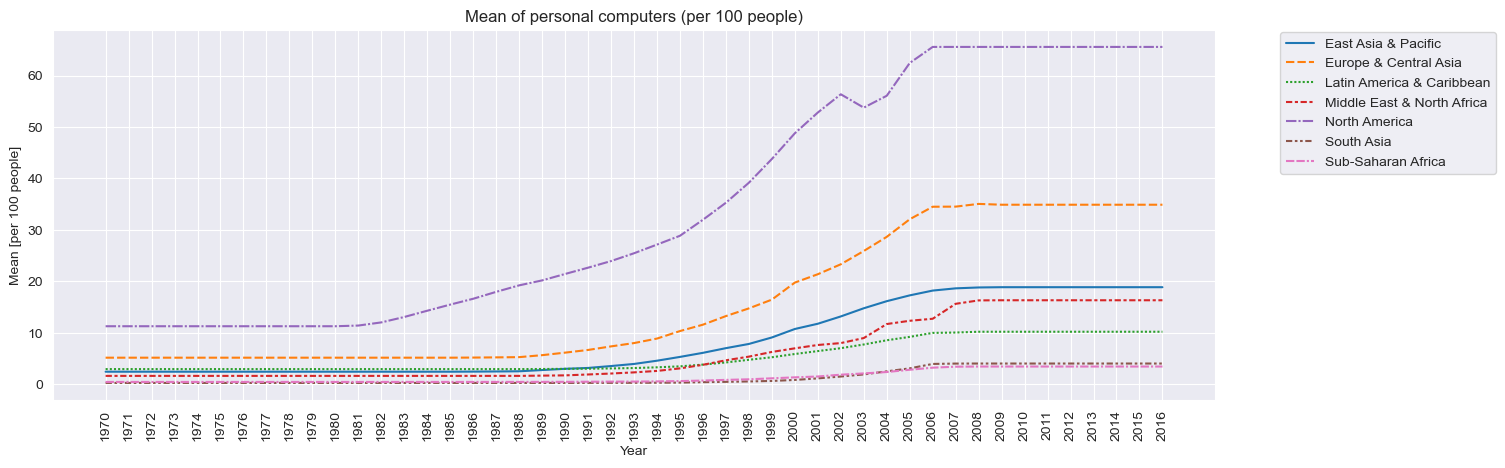

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,0.926518,0.926518,0.926518,0.926518,0.926518,0.926518,0.926518,0.926518,0.926518,0.926518,...,7.938075,7.938075,7.938075,7.938075,7.938075,7.938075,7.938075,7.938075,7.938075,7.938075
Europe & Central Asia,1.806933,1.806933,1.806933,1.806933,1.806933,1.806933,1.806933,1.806933,1.806933,1.806933,...,27.368652,27.368652,27.368652,27.368652,27.368652,27.368652,27.368652,27.368652,27.368652,27.368652
Latin America & Caribbean,1.218277,1.218277,1.218277,1.218277,1.218277,1.218277,1.218277,1.218277,1.218277,1.218277,...,9.589182,10.008749,10.008749,10.008749,10.008749,10.008749,10.008749,10.008749,10.008749,10.008749
Middle East & North Africa,1.027265,1.027265,1.027265,1.027265,1.027265,1.027265,1.027265,1.027265,1.027265,1.027265,...,9.748162,9.945212,9.945212,9.945212,9.945212,9.945212,9.945212,9.945212,9.945212,9.945212
North America,0.912057,0.912057,0.912057,0.912057,0.912057,0.912057,0.912057,0.912057,0.912057,0.912057,...,79.915488,79.915488,79.915488,79.915488,79.915488,79.915488,79.915488,79.915488,79.915488,79.915488


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1970,0.926518,1.806933,1.218277,1.027265,0.912057,0.093086,0.100053
1971,0.926518,1.806933,1.218277,1.027265,0.912057,0.093086,0.100053
1972,0.926518,1.806933,1.218277,1.027265,0.912057,0.093086,0.100053
1973,0.926518,1.806933,1.218277,1.027265,0.912057,0.093086,0.100053
1974,0.926518,1.806933,1.218277,1.027265,0.912057,0.093086,0.100053


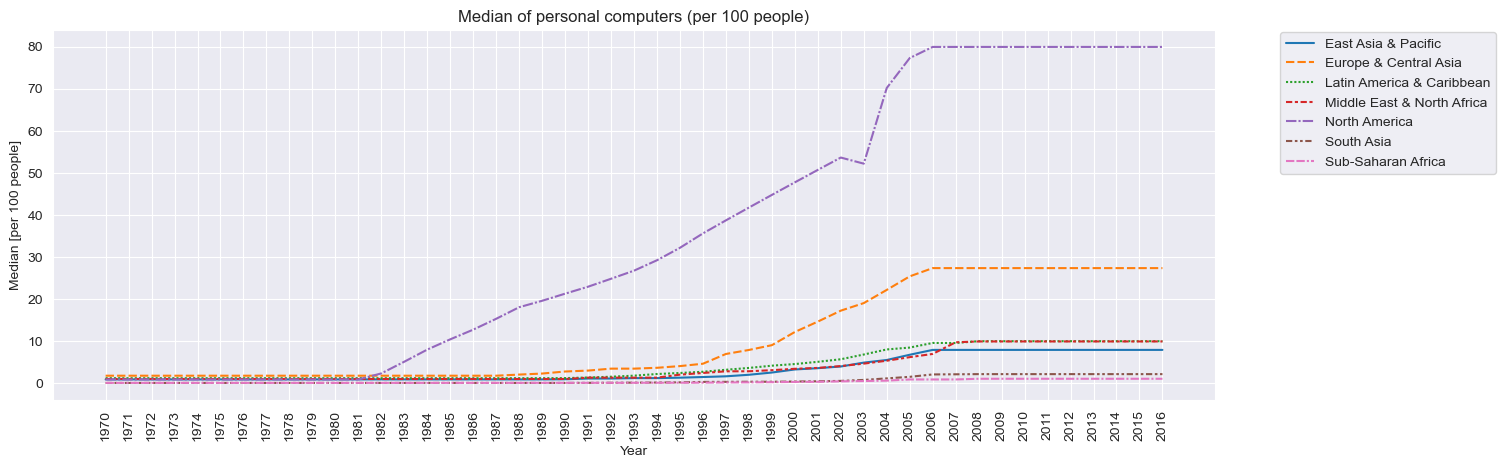

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,3.566985,3.566985,3.566985,3.566985,3.566985,3.566985,3.566985,3.566985,3.566985,3.566985,...,22.413529,22.508442,22.523648,22.523648,22.523648,22.523648,22.523648,22.523648,22.523648,22.523648
Europe & Central Asia,11.521372,11.521372,11.521372,11.521372,11.521372,11.521372,11.521372,11.521372,11.521372,11.521372,...,27.160463,27.274108,27.364620,27.364620,27.364620,27.364620,27.364620,27.364620,27.364620,27.364620
Latin America & Caribbean,3.522128,3.522128,3.522128,3.522128,3.522128,3.522128,3.522128,3.522128,3.522128,3.522128,...,6.282638,6.217086,6.217086,6.217086,6.217086,6.217086,6.217086,6.217086,6.217086,6.217086
Middle East & North Africa,1.737474,1.737474,1.737474,1.737474,1.737474,1.737474,1.737474,1.737474,1.737474,1.737474,...,16.046632,16.864867,16.844011,16.844011,16.844011,16.844011,16.844011,16.844011,16.844011,16.844011
North America,18.424716,18.424716,18.424716,18.424716,18.424716,18.424716,18.424716,18.424716,18.424716,18.424716,...,38.159145,38.159145,38.159145,38.159145,38.159145,38.159145,38.159145,38.159145,38.159145,38.159145


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1970,3.566985,11.521372,3.522128,1.737474,18.424716,0.415432,1.809634
1971,3.566985,11.521372,3.522128,1.737474,18.424716,0.415432,1.809634
1972,3.566985,11.521372,3.522128,1.737474,18.424716,0.415432,1.809634
1973,3.566985,11.521372,3.522128,1.737474,18.424716,0.415432,1.809634
1974,3.566985,11.521372,3.522128,1.737474,18.424716,0.415432,1.809634


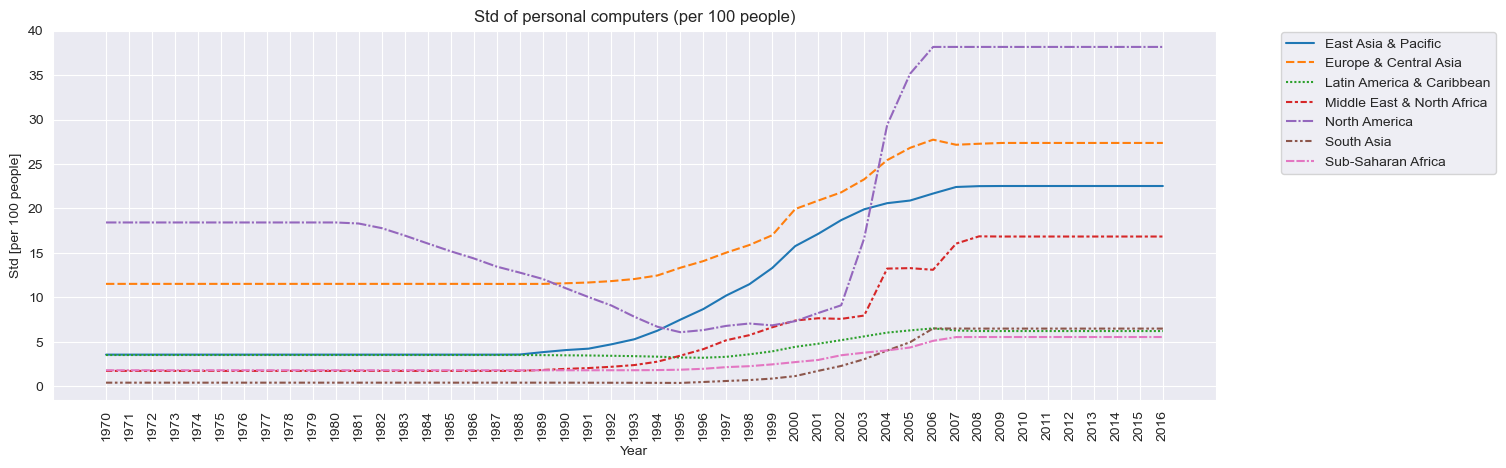

In [71]:
ind = edStatsData_oth_it_merged['Indicator Code'].iloc[0]
group_stat_t_plot(edStatsData_oth_it_merged, ind);

<div style="text-align: justify"> The mean plot gives the same insights as for the previous indicator which are the North America, the Europe &amp; Central Asia and the East Asia &amp; Pacific regions that have the highest personal computers owners. </div> </br>

<div style="text-align: justify"> Let's dive deeper into the regions to see which countries have more personal computers owners. </div>

In [72]:
edStatsData_oth_it_merged = add_mean_med_std_cols(edStatsData_oth_it_merged)
edStatsData_oth_it_merged.head()

,Country Code,Region,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2010,2011,2012,2013,2014,2015,2016,Mean per country,Median per country,Std per country
1,AFG,South Asia,Afghanistan,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.341903,0.341903,0.341903,0.341903,0.341903,...,0.390148,0.390148,0.390148,0.390148,0.390148,0.390148,0.390148,0.353194,0.341903,0.020069
4,ALB,Europe & Central Asia,Albania,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.149654,0.149654,0.149654,0.149654,0.149654,...,4.593538,4.593538,4.593538,4.593538,4.593538,4.593538,4.593538,1.316329,0.149654,1.758649
7,DZA,Middle East & North Africa,Algeria,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.095275,0.095275,0.095275,0.095275,0.095275,...,1.030597,1.030597,1.030597,1.030597,1.030597,1.030597,1.030597,0.450206,0.231749,0.391680
13,AGO,Sub-Saharan Africa,Angola,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.062542,0.062542,0.062542,0.062542,0.062542,...,0.646019,0.646019,0.646019,0.646019,0.646019,0.646019,0.646019,0.228511,0.062542,0.245374
16,ATG,Latin America & Caribbean,Antigua and Barbuda,Personal computers (per 100 people),IT.CMP.PCMP.P2,10.130173,10.130173,10.130173,10.130173,10.130173,...,20.966370,20.966370,20.966370,20.966370,20.966370,20.966370,20.966370,12.904633,10.130173,4.461157


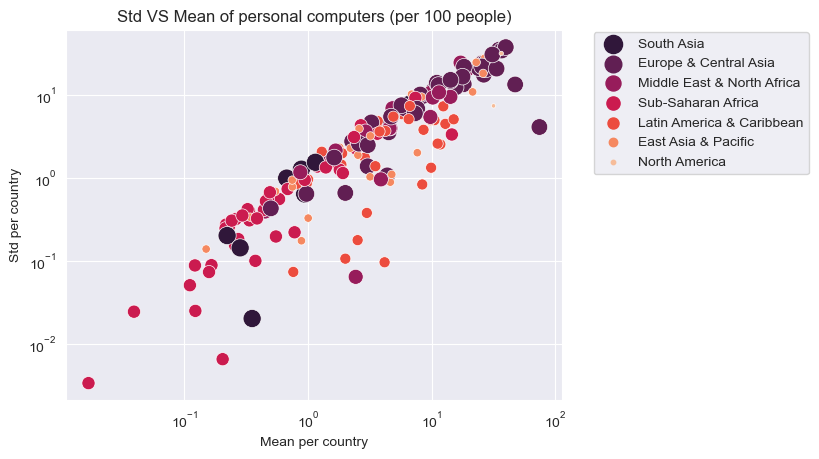

In [73]:
disp_sp_ind(edStatsData_oth_it_merged, 'IT.CMP.PCMP.P2')

In [74]:
edStatsData_oth_it_merged.sort_values(by=['Mean per country', 'Std per country'], ascending=[False, False]).head(15)


,Country Code,Region,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2010,2011,2012,2013,2014,2015,2016,Mean per country,Median per country,Std per country
446,SMR,Europe & Central Asia,San Marino,Personal computers (per 100 people),IT.CMP.PCMP.P2,71.444687,71.444687,71.444687,71.444687,71.444687,...,80.554367,80.554367,80.554367,80.554367,80.554367,80.554367,80.554367,74.348445,71.444687,4.086562
314,LUX,Europe & Central Asia,Luxembourg,Personal computers (per 100 people),IT.CMP.PCMP.P2,37.439252,37.439252,37.439252,37.439252,37.439252,...,68.209751,68.209751,68.209751,68.209751,68.209751,68.209751,68.209751,47.327488,37.439252,13.305510
510,CHE,Europe & Central Asia,Switzerland,Personal computers (per 100 people),IT.CMP.PCMP.P2,5.326061,5.326061,5.326061,5.326061,5.326061,...,96.170657,96.170657,96.170657,96.170657,96.170657,96.170657,96.170657,39.739190,20.202378,37.512623
507,SWE,Europe & Central Asia,Sweden,Personal computers (per 100 people),IT.CMP.PCMP.P2,5.912187,5.912187,5.912187,5.912187,5.912187,...,88.011928,88.011928,88.011928,88.011928,88.011928,88.011928,88.011928,36.809084,16.541801,34.142619
559,USA,North America,United States,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.912057,0.912057,0.912057,0.912057,0.912057,...,79.915488,79.915488,79.915488,79.915488,79.915488,79.915488,79.915488,36.556638,28.000892,31.496676
379,NLD,Europe & Central Asia,Netherlands,Personal computers (per 100 people),IT.CMP.PCMP.P2,5.101804,5.101804,5.101804,5.101804,5.101804,...,90.987849,90.987849,90.987849,90.987849,90.987849,90.987849,90.987849,35.011583,15.718383,34.891894
99,CAN,North America,Canada,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.407979,0.407979,0.407979,0.407979,0.407979,...,94.446705,94.446705,94.446705,94.446705,94.446705,94.446705,94.446705,34.927569,18.374189,37.294443
397,NOR,Europe & Central Asia,Norway,Personal computers (per 100 people),IT.CMP.PCMP.P2,14.545908,14.545908,14.545908,14.545908,14.545908,...,62.775903,62.775903,62.775903,62.775903,62.775903,62.775903,62.775903,33.487600,20.956612,20.681567
60,BMU,North America,Bermuda,Personal computers (per 100 people),IT.CMP.PCMP.P2,32.569577,32.569577,32.569577,32.569577,32.569577,...,22.296631,22.296631,22.296631,22.296631,22.296631,22.296631,22.296631,31.650746,32.569577,7.347043
28,AUS,East Asia & Pacific,Australia,Personal computers (per 100 people),IT.CMP.PCMP.P2,10.248343,10.248343,10.248343,10.248343,10.248343,...,60.140967,60.140967,60.140967,60.140967,60.140967,60.140967,60.140967,31.191537,22.300823,21.543818


<div style="text-align: justify"> The resulting plot shows almost the same analysis as the previous indicator. A last step can be performed; the filtering by regions to get only countries within a specific region. </div>

In [75]:
cond = (edStatsData_oth_it_merged['Region'] == 'North America') | (edStatsData_oth_it_merged['Region'] == 'Europe & Central Asia')
edStatsData_oth_it_merged.loc[cond, :].sort_values(by=['Mean per country', 'Std per country'], ascending=[False, False]).head(30)


,Country Code,Region,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2010,2011,2012,2013,2014,2015,2016,Mean per country,Median per country,Std per country
446,SMR,Europe & Central Asia,San Marino,Personal computers (per 100 people),IT.CMP.PCMP.P2,71.444687,71.444687,71.444687,71.444687,71.444687,...,80.554367,80.554367,80.554367,80.554367,80.554367,80.554367,80.554367,74.348445,71.444687,4.086562
314,LUX,Europe & Central Asia,Luxembourg,Personal computers (per 100 people),IT.CMP.PCMP.P2,37.439252,37.439252,37.439252,37.439252,37.439252,...,68.209751,68.209751,68.209751,68.209751,68.209751,68.209751,68.209751,47.327488,37.439252,13.305510
510,CHE,Europe & Central Asia,Switzerland,Personal computers (per 100 people),IT.CMP.PCMP.P2,5.326061,5.326061,5.326061,5.326061,5.326061,...,96.170657,96.170657,96.170657,96.170657,96.170657,96.170657,96.170657,39.739190,20.202378,37.512623
507,SWE,Europe & Central Asia,Sweden,Personal computers (per 100 people),IT.CMP.PCMP.P2,5.912187,5.912187,5.912187,5.912187,5.912187,...,88.011928,88.011928,88.011928,88.011928,88.011928,88.011928,88.011928,36.809084,16.541801,34.142619
559,USA,North America,United States,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.912057,0.912057,0.912057,0.912057,0.912057,...,79.915488,79.915488,79.915488,79.915488,79.915488,79.915488,79.915488,36.556638,28.000892,31.496676
379,NLD,Europe & Central Asia,Netherlands,Personal computers (per 100 people),IT.CMP.PCMP.P2,5.101804,5.101804,5.101804,5.101804,5.101804,...,90.987849,90.987849,90.987849,90.987849,90.987849,90.987849,90.987849,35.011583,15.718383,34.891894
99,CAN,North America,Canada,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.407979,0.407979,0.407979,0.407979,0.407979,...,94.446705,94.446705,94.446705,94.446705,94.446705,94.446705,94.446705,34.927569,18.374189,37.294443
397,NOR,Europe & Central Asia,Norway,Personal computers (per 100 people),IT.CMP.PCMP.P2,14.545908,14.545908,14.545908,14.545908,14.545908,...,62.775903,62.775903,62.775903,62.775903,62.775903,62.775903,62.775903,33.487600,20.956612,20.681567
60,BMU,North America,Bermuda,Personal computers (per 100 people),IT.CMP.PCMP.P2,32.569577,32.569577,32.569577,32.569577,32.569577,...,22.296631,22.296631,22.296631,22.296631,22.296631,22.296631,22.296631,31.650746,32.569577,7.347043
556,GBR,Europe & Central Asia,United Kingdom,Personal computers (per 100 people),IT.CMP.PCMP.P2,3.715705,3.715705,3.715705,3.715705,3.715705,...,80.170361,80.170361,80.170361,80.170361,80.170361,80.170361,80.170361,30.973139,16.881794,30.588385


### <font color='grey'>Analysis of the Population growth ages15-24 indicator</font>

<div style="text-align: justify"> For this last indicator, all of the steps are exactly the same as the two previous indicators. </div>

In [76]:
# Retrieving the population growth indicator
indicator = ['SP.POP.1524.TO.UN']
edStatsData_oth_pop_merged = retrieve_indicator(edStatsData_oth_merged, indicator)

,Country Code,Region,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
2,AFG,South Asia,Afghanistan,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2423555.0,2423555.0,2423555.0,2423555.0,2423555.0,...,5367499.0,5606736.0,5848604.0,6090239.0,6330684.0,6569239.0,6803785.0,7032072.0,7252785.0,7252785.0
5,ALB,Europe & Central Asia,Albania,"Population, ages 15-24, total",SP.POP.1524.TO.UN,641446.0,641446.0,641446.0,641446.0,641446.0,...,602317.0,607609.0,609841.0,608456.0,603104.0,594101.0,582411.0,569427.0,556269.0,556269.0
8,DZA,Middle East & North Africa,Algeria,"Population, ages 15-24, total",SP.POP.1524.TO.UN,5158195.0,5158195.0,5158195.0,5158195.0,5158195.0,...,7433466.0,7403074.0,7340706.0,7245764.0,7118500.0,6964424.0,6795040.0,6625398.0,6467818.0,6467818.0
11,AND,Europe & Central Asia,Andorra,"Population, ages 15-24, total",SP.POP.1524.TO.UN,8315.0,8315.0,8315.0,8315.0,8315.0,...,8715.0,8715.0,8715.0,8715.0,8715.0,8715.0,8715.0,8715.0,8715.0,8715.0
14,AGO,Sub-Saharan Africa,Angola,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2001583.0,2001583.0,2001583.0,2001583.0,2001583.0,...,3448163.0,3560040.0,3669555.0,3774989.0,3875706.0,3972550.0,4067194.0,4162115.0,4259352.0,4259352.0


SP.POP.1524.TO.UN : (192, 52)


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,1.267799e+07,1.267799e+07,1.267799e+07,1.267799e+07,1.267799e+07,1.267799e+07,1.267799e+07,1.267799e+07,1.267799e+07,1.267799e+07,...,1.201420e+07,1.202783e+07,1.199946e+07,1.193228e+07,1.182265e+07,1.167165e+07,1.149385e+07,1.130914e+07,1.113271e+07,1.113271e+07
Europe & Central Asia,2.642251e+06,2.642251e+06,2.642251e+06,2.642251e+06,2.642251e+06,2.642251e+06,2.642251e+06,2.642251e+06,2.642251e+06,2.642251e+06,...,2.647626e+06,2.613361e+06,2.571714e+06,2.524474e+06,2.471724e+06,2.414253e+06,2.355530e+06,2.299951e+06,2.250838e+06,2.250838e+06
Latin America & Caribbean,2.485260e+06,2.485260e+06,2.485260e+06,2.485260e+06,2.485260e+06,2.485260e+06,2.485260e+06,2.485260e+06,2.485260e+06,2.485260e+06,...,2.969420e+06,2.980226e+06,2.990773e+06,3.000809e+06,3.010462e+06,3.019905e+06,3.028946e+06,3.037307e+06,3.044773e+06,3.044773e+06
Middle East & North Africa,2.334258e+06,2.334258e+06,2.334258e+06,2.334258e+06,2.334258e+06,2.334258e+06,2.334258e+06,2.334258e+06,2.334258e+06,2.334258e+06,...,3.617128e+06,3.632714e+06,3.637938e+06,3.633741e+06,3.620473e+06,3.599616e+06,3.574728e+06,3.550321e+06,3.530033e+06,3.530033e+06
North America,1.384134e+07,1.384134e+07,1.384134e+07,1.384134e+07,1.384134e+07,1.384134e+07,1.384134e+07,1.384134e+07,1.384134e+07,1.384134e+07,...,1.613112e+07,1.630862e+07,1.644921e+07,1.654713e+07,1.659940e+07,1.660995e+07,1.658908e+07,1.655150e+07,1.650938e+07,1.650938e+07


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1970,12677986.7,2.642251e+06,2485260.2,2.334258e+06,13841336.0,27189478.75,2.110256e+06
1971,12677986.7,2.642251e+06,2485260.2,2.334258e+06,13841336.0,27189478.75,2.110256e+06
1972,12677986.7,2.642251e+06,2485260.2,2.334258e+06,13841336.0,27189478.75,2.110256e+06
1973,12677986.7,2.642251e+06,2485260.2,2.334258e+06,13841336.0,27189478.75,2.110256e+06
1974,12677986.7,2.642251e+06,2485260.2,2.334258e+06,13841336.0,27189478.75,2.110256e+06


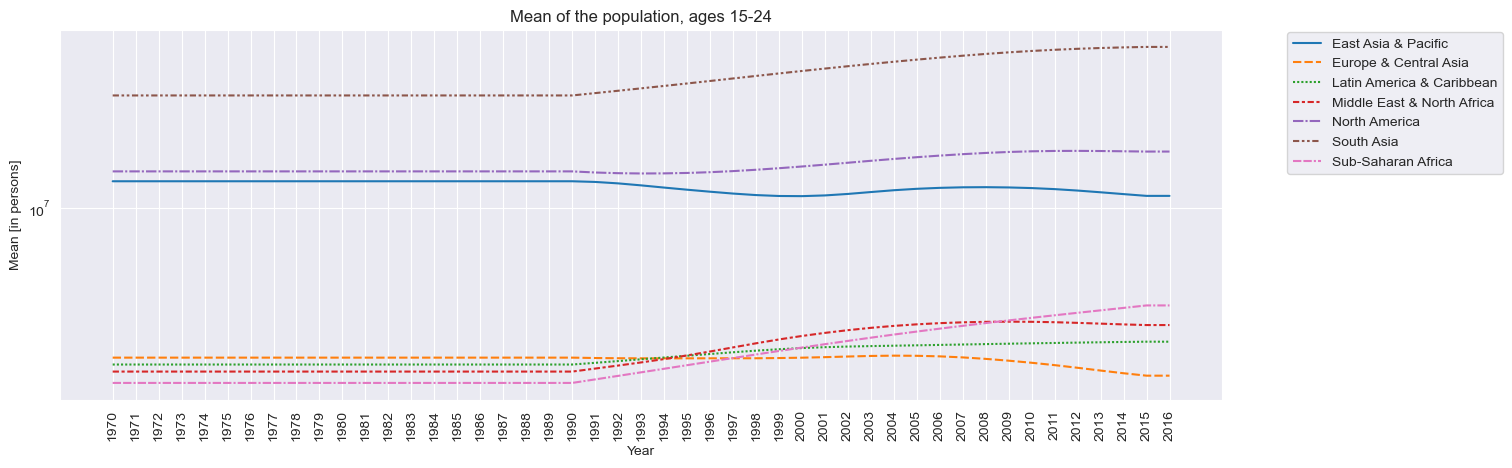

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,696014.5,696014.5,696014.5,696014.5,696014.5,696014.5,696014.5,696014.5,696014.5,696014.5,...,752029.5,754670.5,763704.5,770908.0,776195.0,779551.5,779988.5,776342.0,767924.5,767924.5
Europe & Central Asia,985429.0,985429.0,985429.0,985429.0,985429.0,985429.0,985429.0,985429.0,985429.0,985429.0,...,1051849.5,1062390.5,1068130.5,1068322.5,1062530.5,1051216.5,1035726.5,1017995.5,999616.0,999616.0
Latin America & Caribbean,583766.0,583766.0,583766.0,583766.0,583766.0,583766.0,583766.0,583766.0,583766.0,583766.0,...,876482.0,881231.0,882997.0,882212.0,878939.0,873368.0,866247.0,858514.0,850912.0,850912.0
Middle East & North Africa,791637.0,791637.0,791637.0,791637.0,791637.0,791637.0,791637.0,791637.0,791637.0,791637.0,...,1198273.0,1186809.0,1154530.0,1130263.0,1137124.0,1152976.0,1170822.0,1190459.0,1211599.0,1211599.0
North America,4062734.0,4062734.0,4062734.0,4062734.0,4062734.0,4062734.0,4062734.0,4062734.0,4062734.0,4062734.0,...,4423895.0,4459623.0,4485153.0,4497200.0,4494958.0,4479644.0,4452709.0,4416539.0,4373511.0,4373511.0


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1970,696014.5,985429.0,583766.0,791637.0,4062734.0,3520740.0,1130812.0
1971,696014.5,985429.0,583766.0,791637.0,4062734.0,3520740.0,1130812.0
1972,696014.5,985429.0,583766.0,791637.0,4062734.0,3520740.0,1130812.0
1973,696014.5,985429.0,583766.0,791637.0,4062734.0,3520740.0,1130812.0
1974,696014.5,985429.0,583766.0,791637.0,4062734.0,3520740.0,1130812.0


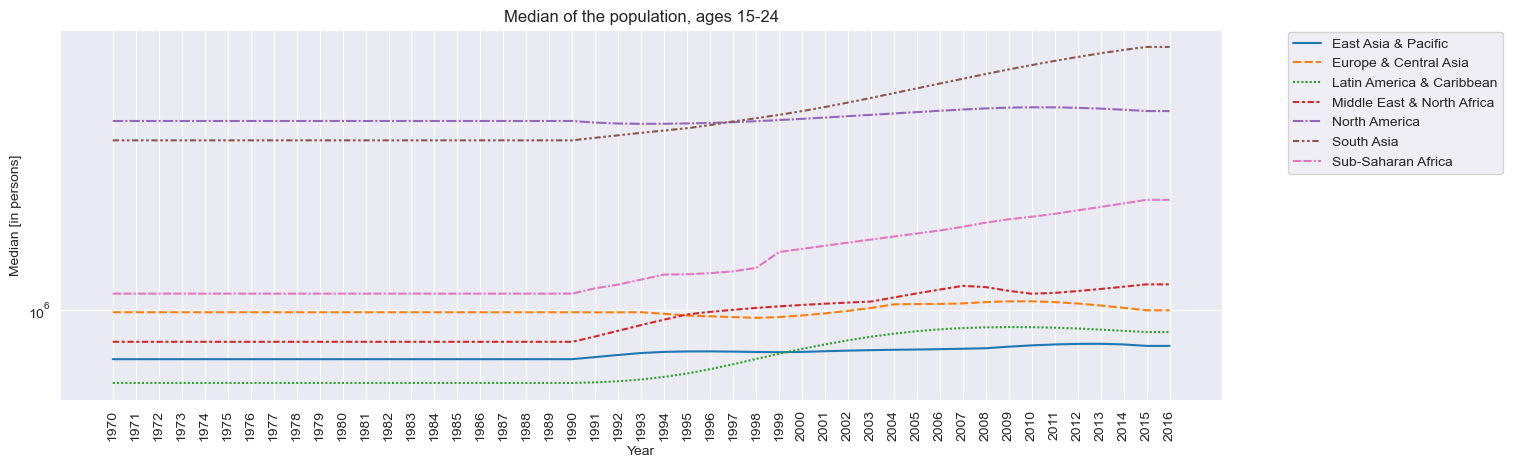

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,4.589822e+07,4.589822e+07,4.589822e+07,4.589822e+07,4.589822e+07,4.589822e+07,4.589822e+07,4.589822e+07,4.589822e+07,4.589822e+07,...,4.054294e+07,4.058513e+07,4.042446e+07,4.007895e+07,3.953021e+07,3.878268e+07,3.791009e+07,3.701257e+07,3.616593e+07,3.616593e+07
Europe & Central Asia,3.935274e+06,3.935274e+06,3.935274e+06,3.935274e+06,3.935274e+06,3.935274e+06,3.935274e+06,3.935274e+06,3.935274e+06,3.935274e+06,...,4.237953e+06,4.131114e+06,4.011487e+06,3.888011e+06,3.762737e+06,3.637797e+06,3.521164e+06,3.420637e+06,3.340220e+06,3.340220e+06
Latin America & Caribbean,5.666093e+06,5.666093e+06,5.666093e+06,5.666093e+06,5.666093e+06,5.666093e+06,5.666093e+06,5.666093e+06,5.666093e+06,5.666093e+06,...,6.619560e+06,6.584655e+06,6.554305e+06,6.532316e+06,6.520018e+06,6.516972e+06,6.522469e+06,6.534994e+06,6.553111e+06,6.553111e+06
Middle East & North Africa,3.108595e+06,3.108595e+06,3.108595e+06,3.108595e+06,3.108595e+06,3.108595e+06,3.108595e+06,3.108595e+06,3.108595e+06,3.108595e+06,...,4.885448e+06,4.874057e+06,4.841100e+06,4.788088e+06,4.716267e+06,4.630512e+06,4.540458e+06,4.457452e+06,4.389639e+06,4.389639e+06
North America,2.054992e+07,2.054992e+07,2.054992e+07,2.054992e+07,2.054992e+07,2.054992e+07,2.054992e+07,2.054992e+07,2.054992e+07,2.054992e+07,...,2.420352e+07,2.448049e+07,2.470215e+07,2.486121e+07,2.495320e+07,2.498392e+07,2.496994e+07,2.493471e+07,2.489726e+07,2.489726e+07


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
1970,4.589822e+07,3.935274e+06,5.666093e+06,3.108595e+06,2.054992e+07,5.621537e+07,3.136489e+06
1971,4.589822e+07,3.935274e+06,5.666093e+06,3.108595e+06,2.054992e+07,5.621537e+07,3.136489e+06
1972,4.589822e+07,3.935274e+06,5.666093e+06,3.108595e+06,2.054992e+07,5.621537e+07,3.136489e+06
1973,4.589822e+07,3.935274e+06,5.666093e+06,3.108595e+06,2.054992e+07,5.621537e+07,3.136489e+06
1974,4.589822e+07,3.935274e+06,5.666093e+06,3.108595e+06,2.054992e+07,5.621537e+07,3.136489e+06


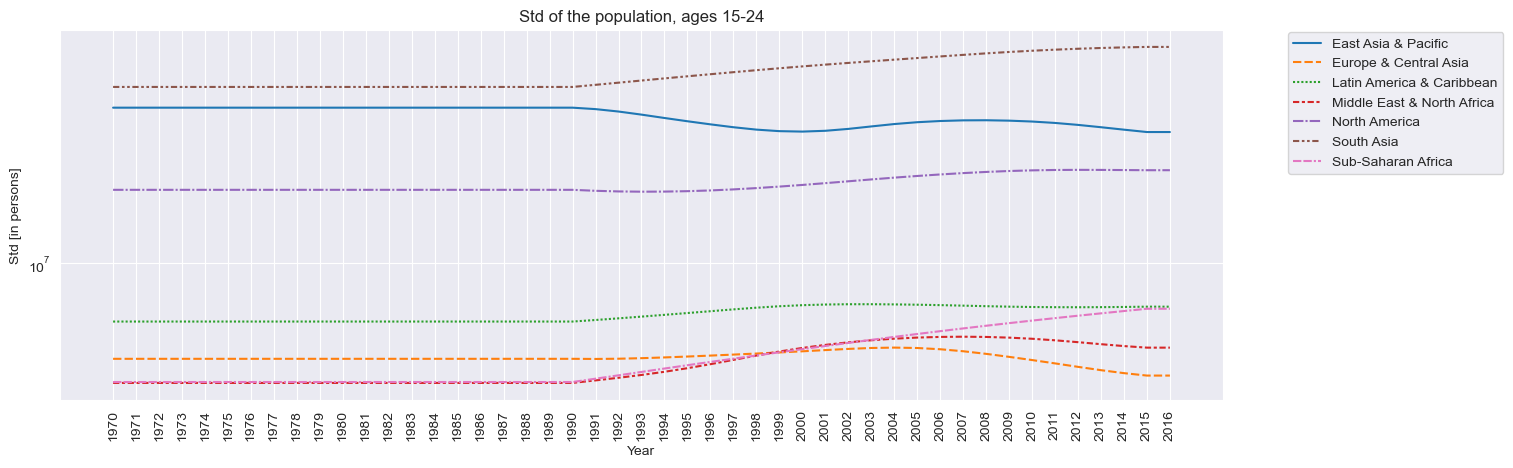

In [77]:
ind = edStatsData_oth_pop_merged['Indicator Code'].iloc[0]
group_stat_t_plot(edStatsData_oth_pop_merged, ind);

<div style="text-align: justify"> This time, the mean plot displays a huge dominance of the South Asia line followed by North America and East Asia &amp; Pacific. This plot is relevant since most of the countries of these regions have very high population and so population ages 15-24. A computation of summary statistics can be done here to determine which countries have the most population. </div>

In [78]:
edStatsData_oth_pop_merged = add_mean_med_std_cols(edStatsData_oth_pop_merged)
edStatsData_oth_pop_merged.head()

,Country Code,Region,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2010,2011,2012,2013,2014,2015,2016,Mean per country,Median per country,Std per country
2,AFG,South Asia,Afghanistan,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2423555.0,2423555.0,2423555.0,2423555.0,2423555.0,...,6090239.0,6330684.0,6569239.0,6803785.0,7032072.0,7252785.0,7252785.0,3.763807e+06,3173749.0,1.569395e+06
5,ALB,Europe & Central Asia,Albania,"Population, ages 15-24, total",SP.POP.1524.TO.UN,641446.0,641446.0,641446.0,641446.0,641446.0,...,608456.0,603104.0,594101.0,582411.0,569427.0,556269.0,556269.0,6.042342e+05,609148.5,3.882394e+04
8,DZA,Middle East & North Africa,Algeria,"Population, ages 15-24, total",SP.POP.1524.TO.UN,5158195.0,5158195.0,5158195.0,5158195.0,5158195.0,...,7245764.0,7118500.0,6964424.0,6795040.0,6625398.0,6467818.0,6467818.0,6.015549e+06,5704946.0,8.893808e+05
11,AND,Europe & Central Asia,Andorra,"Population, ages 15-24, total",SP.POP.1524.TO.UN,8315.0,8315.0,8315.0,8315.0,8315.0,...,8715.0,8715.0,8715.0,8715.0,8715.0,8715.0,8715.0,8.304043e+03,8315.0,3.859280e+02
14,AGO,Sub-Saharan Africa,Angola,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2001583.0,2001583.0,2001583.0,2001583.0,2001583.0,...,3774989.0,3875706.0,3972550.0,4067194.0,4162115.0,4259352.0,4259352.0,2.625319e+06,2239198.5,7.537410e+05


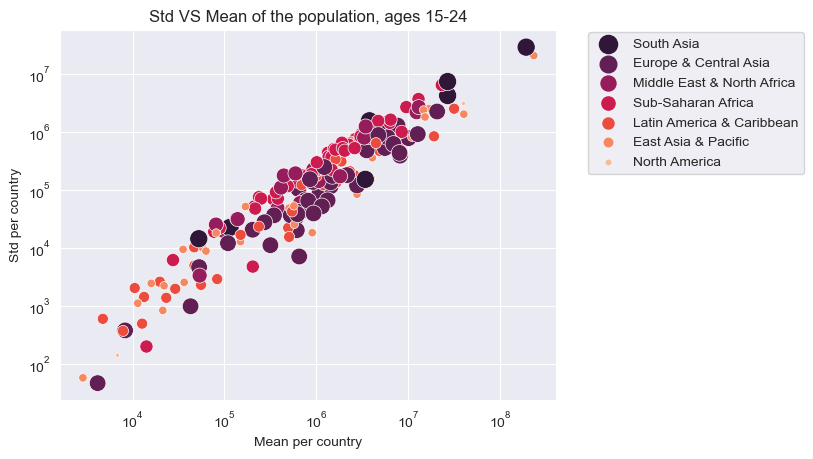

In [79]:
disp_sp_ind(edStatsData_oth_pop_merged, 'SP.POP.1524.TO.UN')


In [80]:
edStatsData_oth_pop_merged.sort_values(by=['Mean per country', 'Std per country'], ascending=[False, False]).head(15)

,Country Code,Region,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2010,2011,2012,2013,2014,2015,2016,Mean per country,Median per country,Std per country
115,CHN,East Asia & Pacific,China,"Population, ages 15-24, total",SP.POP.1524.TO.UN,251916129.0,251916129.0,251916129.0,251916129.0,251916129.0,...,218974009.0,215914397.0,211735888.0,206846521.0,201802535.0,197026759.0,197026759.0,2.309699e+08,2.329321e+08,2.087929e+07
244,IND,South Asia,India,"Population, ages 15-24, total",SP.POP.1524.TO.UN,164495877.0,164495877.0,164495877.0,164495877.0,164495877.0,...,235056806.0,237548472.0,239713636.0,241535030.0,243002731.0,244120201.0,244120201.0,1.905116e+08,1.770673e+08,2.909472e+07
247,IDN,East Asia & Pacific,Indonesia,"Population, ages 15-24, total",SP.POP.1524.TO.UN,37925781.0,37925781.0,37925781.0,37925781.0,37925781.0,...,42184439.0,42057105.0,41947672.0,41865701.0,41821108.0,41819264.0,41819264.0,4.002790e+07,3.982656e+07,2.038833e+06
560,USA,North America,United States,"Population, ages 15-24, total",SP.POP.1524.TO.UN,37454507.0,37454507.0,37454507.0,37454507.0,37454507.0,...,45137089.0,45296141.0,45343097.0,45307415.0,45230846.0,45147517.0,45147517.0,3.961227e+07,3.745451e+07,3.122751e+06
76,BRA,Latin America & Caribbean,Brazil,"Population, ages 15-24, total",SP.POP.1524.TO.UN,28911403.0,28911403.0,28911403.0,28911403.0,28911403.0,...,33736994.0,33540594.0,33432501.0,33412052.0,33469835.0,33595574.0,33595574.0,3.139072e+07,3.051520e+07,2.532565e+06
44,BGD,South Asia,Bangladesh,"Population, ages 15-24, total",SP.POP.1524.TO.UN,22968853.0,22968853.0,22968853.0,22968853.0,22968853.0,...,33329520.0,33606251.0,33830724.0,34021878.0,34205526.0,34400594.0,34400594.0,2.669812e+07,2.438350e+07,4.268616e+06
404,PAK,South Asia,Pakistan,"Population, ages 15-24, total",SP.POP.1524.TO.UN,20448198.0,20448198.0,20448198.0,20448198.0,20448198.0,...,38872192.0,39187013.0,39348176.0,39370153.0,39273580.0,39080811.0,39080811.0,2.667255e+07,2.192511e+07,7.431302e+06
394,NGA,Sub-Saharan Africa,Nigeria,"Population, ages 15-24, total",SP.POP.1524.TO.UN,17572445.0,17572445.0,17572445.0,17572445.0,17572445.0,...,32773554.0,33562072.0,34342138.0,35116233.0,35887772.0,36659023.0,36659023.0,2.304768e+07,1.960319e+07,6.487497e+06
438,RUS,Europe & Central Asia,Russian Federation,"Population, ages 15-24, total",SP.POP.1524.TO.UN,19872588.0,19872588.0,19872588.0,19872588.0,19872588.0,...,20196327.0,18999436.0,17759876.0,16560947.0,15504104.0,14661984.0,14661984.0,2.052028e+07,1.987259e+07,2.267501e+06
351,MEX,Latin America & Caribbean,Mexico,"Population, ages 15-24, total",SP.POP.1524.TO.UN,18112978.0,18112978.0,18112978.0,18112978.0,18112978.0,...,19877068.0,20044489.0,20177898.0,20271973.0,20325060.0,20336734.0,20336734.0,1.898135e+07,1.899306e+07,8.489493e+05


In [81]:
cond = (edStatsData_oth_pop_merged['Region'] == 'North America') | (edStatsData_oth_pop_merged['Region'] == 'South Asia')
edStatsData_oth_pop_merged.loc[cond, :].sort_values(by=['Mean per country', 'Std per country'], ascending=[False, False]).head(15)


,Country Code,Region,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2010,2011,2012,2013,2014,2015,2016,Mean per country,Median per country,Std per country
244,IND,South Asia,India,"Population, ages 15-24, total",SP.POP.1524.TO.UN,164495877.0,164495877.0,164495877.0,164495877.0,164495877.0,...,235056806.0,237548472.0,239713636.0,241535030.0,243002731.0,244120201.0,244120201.0,1.905116e+08,177067279.0,2.909472e+07
560,USA,North America,United States,"Population, ages 15-24, total",SP.POP.1524.TO.UN,37454507.0,37454507.0,37454507.0,37454507.0,37454507.0,...,45137089.0,45296141.0,45343097.0,45307415.0,45230846.0,45147517.0,45147517.0,3.961227e+07,37454507.0,3.122751e+06
44,BGD,South Asia,Bangladesh,"Population, ages 15-24, total",SP.POP.1524.TO.UN,22968853.0,22968853.0,22968853.0,22968853.0,22968853.0,...,33329520.0,33606251.0,33830724.0,34021878.0,34205526.0,34400594.0,34400594.0,2.669812e+07,24383505.0,4.268616e+06
404,PAK,South Asia,Pakistan,"Population, ages 15-24, total",SP.POP.1524.TO.UN,20448198.0,20448198.0,20448198.0,20448198.0,20448198.0,...,38872192.0,39187013.0,39348176.0,39370153.0,39273580.0,39080811.0,39080811.0,2.667255e+07,21925113.0,7.431302e+06
377,NPL,South Asia,Nepal,"Population, ages 15-24, total",SP.POP.1524.TO.UN,3673165.0,3673165.0,3673165.0,3673165.0,3673165.0,...,6208440.0,6352678.0,6490448.0,6616767.0,6725496.0,6812730.0,6812730.0,4.564689e+06,3993490.0,1.070907e+06
100,CAN,North America,Canada,"Population, ages 15-24, total",SP.POP.1524.TO.UN,4062734.0,4062734.0,4062734.0,4062734.0,4062734.0,...,4497200.0,4494958.0,4479644.0,4452709.0,4416539.0,4373511.0,4373511.0,4.163514e+06,4062734.0,1.665024e+05
2,AFG,South Asia,Afghanistan,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2423555.0,2423555.0,2423555.0,2423555.0,2423555.0,...,6090239.0,6330684.0,6569239.0,6803785.0,7032072.0,7252785.0,7252785.0,3.763807e+06,3173749.0,1.569395e+06
487,LKA,South Asia,Sri Lanka,"Population, ages 15-24, total",SP.POP.1524.TO.UN,3368315.0,3368315.0,3368315.0,3368315.0,3368315.0,...,3278605.0,3208283.0,3143819.0,3085812.0,3033966.0,2987954.0,2987954.0,3.396827e+06,3368315.0,1.540785e+05
64,BTN,South Asia,Bhutan,"Population, ages 15-24, total",SP.POP.1524.TO.UN,98417.0,98417.0,98417.0,98417.0,98417.0,...,153044.0,152776.0,152205.0,151228.0,149674.0,147444.0,147444.0,1.147994e+05,98417.0,2.287610e+04
333,MDV,South Asia,Maldives,"Population, ages 15-24, total",SP.POP.1524.TO.UN,39450.0,39450.0,39450.0,39450.0,39450.0,...,76777.0,76210.0,75132.0,73646.0,71886.0,69984.0,69984.0,5.256140e+04,44602.5,1.460770e+04


<div style="text-align: justify"> To compare with what it has been retrieved from the standard indicators, a filter is applied on the projection indicator to see what countries in North America or Europe &amp; Central Asia have the most potential to fullfil our services. </div>

In [82]:
cond = (edStatsData_prj_merged['Region'] == 'North America') | (edStatsData_prj_merged['Region'] == 'South Asia')
edStatsData_prj_merged.loc[cond, :].sort_values(by=['Mean per country', 'Std per country'], ascending=[False, False]).head(10)


,Country Code,Region,Country Name,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,...,2070,2075,2080,2085,2090,2095,2100,Mean per country,Median per country,Std per country
106,NPL,South Asia,Nepal,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.32,0.36,0.40,0.43,0.47,...,0.61,0.62,0.63,0.64,0.65,0.65,0.65,0.538824,0.560000,0.099737
159,USA,North America,United States,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.50,0.50,0.49,0.48,0.48,...,0.43,0.42,0.41,0.40,0.39,0.38,0.37,0.441176,0.440588,0.038646
67,IND,South Asia,India,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.27,0.30,0.32,0.34,0.36,...,0.47,0.48,0.49,0.50,0.51,0.51,0.51,0.421176,0.430588,0.073506
114,PAK,South Asia,Pakistan,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.22,0.24,0.27,0.29,0.32,...,0.48,0.50,0.52,0.53,0.55,0.56,0.56,0.414706,0.422353,0.106987
26,CAN,North America,Canada,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.35,0.34,0.33,0.33,0.32,...,0.26,0.25,0.24,0.23,0.23,0.22,0.21,0.280000,0.280000,0.041675
16,BTN,South Asia,Bhutan,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.07,0.08,0.10,0.11,0.13,...,0.25,0.27,0.29,0.31,0.33,0.35,0.37,0.211765,0.210882,0.089633
11,BGD,South Asia,Bangladesh,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.09,0.10,0.12,0.13,0.14,...,0.23,0.24,0.26,0.27,0.28,0.30,0.31,0.198824,0.199412,0.065041
94,MDV,South Asia,Maldives,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.04,0.05,0.06,0.07,0.09,...,0.18,0.20,0.22,0.24,0.26,0.28,0.30,0.155882,0.152941,0.076578


In [83]:
cond = (edStatsData_prj_merged['Region'] == 'Europe & Central Asia')
edStatsData_prj_merged.loc[cond, :].sort_values(by=['Mean per country', 'Std per country'], ascending=[False, False]).head(10)


,Country Code,Region,Country Name,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,...,2070,2075,2080,2085,2090,2095,2100,Mean per country,Median per country,Std per country
154,TKM,Europe & Central Asia,Turkmenistan,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.78,0.79,0.79,0.80,0.80,...,0.77,0.76,0.75,0.74,0.72,0.71,0.69,0.767059,0.780000,0.031214
81,KGZ,Europe & Central Asia,Kyrgyz Republic,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.74,0.74,0.75,0.76,0.76,...,0.74,0.74,0.73,0.71,0.70,0.69,0.68,0.737059,0.740000,0.024237
133,SVK,Europe & Central Asia,Slovak Republic,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.72,0.73,0.74,0.75,0.75,...,0.72,0.70,0.69,0.67,0.66,0.64,0.63,0.712353,0.725000,0.037033
146,TJK,Europe & Central Asia,Tajikistan,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.65,0.66,0.68,0.69,0.70,...,0.72,0.71,0.71,0.70,0.69,0.68,0.67,0.696471,0.700000,0.020261
8,AZE,Europe & Central Asia,Azerbaijan,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.66,0.67,0.68,0.68,0.69,...,0.70,0.70,0.70,0.69,0.69,0.68,0.67,0.690588,0.690294,0.013944
40,CZE,Europe & Central Asia,Czech Republic,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.72,0.72,0.73,0.73,0.73,...,0.69,0.67,0.66,0.64,0.63,0.61,0.60,0.688824,0.705000,0.041438
18,BIH,Europe & Central Asia,Bosnia and Herzegovina,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.58,0.61,0.63,0.65,0.67,...,0.73,0.73,0.73,0.72,0.71,0.70,0.69,0.688235,0.700000,0.041914
156,UKR,Europe & Central Asia,Ukraine,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.71,0.71,0.72,0.72,0.72,...,0.67,0.66,0.65,0.63,0.62,0.61,0.59,0.678235,0.695000,0.040206
123,ROU,Europe & Central Asia,Romania,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.56,0.59,0.62,0.64,0.66,...,0.70,0.70,0.70,0.69,0.68,0.67,0.66,0.665294,0.675000,0.037915
37,HRV,Europe & Central Asia,Croatia,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.15UP.3.MF,0.61,0.63,0.65,0.67,0.68,...,0.68,0.68,0.67,0.66,0.64,0.63,0.62,0.662941,0.670000,0.025340
